- **Name - Aditya Jain**

- **Batch No. - DS2310**

- **Assingment - Global_Power_Plant**

In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 907
No. of columns 27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

**Observation-:**

- Dataset contains 907 rows with 27 column
- some of features are with object datatype and other with float.

# Statistical Analysis

Before going for statistical exploration of data, first check integrity of data & missing value

**Data Integrity check**

Let Check if any whitespace,'?' 'NA' or '-' exist in datasets

In [5]:
data.isin([' ','NA','-','?']).sum().any()

False

**Observation-:**

No Whitespacen, NA, '-' exist in datset.

**Since dataset is large lets check for any entry whic is repeated or duplicated in datasets**

In [6]:
data.duplicated().sum()

0

**No duplicate Entry present in data**

if we check CSV file and look at datasets head, there are lot of data cleaning operations need to done before performing any EDA and ML Modeling. At sight we can come across following observation in csv file.

- Lot of missing data in certain columns.
- Lot of Non-Relevent data like gppd_idnr,url.
- and many more.

At end data need to clean and we will try to do some features engineering afterwardsto modify some columns.

# Start with looking at missing values

**Befor checking null values and missing value imputations, first remove empty columns and non relevent columns.**

In [7]:
data.drop(columns=['country','country_long','url','year_of_capacity_data','gppd_idnr','owner',
                  'other_fuel2','other_fuel3','estimated_generation_gwh','wepp_id'],axis = 1,inplace = True)

**Missing Value Check-:**

In [8]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                        Missing_values  %Missing values
generation_gwh_2019                907       100.000000
generation_gwh_2013                907       100.000000
other_fuel1                        709        78.169791
generation_gwh_2014                509        56.119074
generation_gwh_2015                485        53.472988
generation_gwh_2016                473        52.149945
generation_gwh_2017                467        51.488423
generation_gwh_2018                459        50.606395
generation_data_source             458        50.496141
commissioning_year                 380        41.896362
latitude                            46         5.071665
longitude                           46         5.071665
geolocation_source                  19         2.094818
capacity_mw                          0         0.000000
source                               0         0.000000
primary_fuel                         0         0.000000
name                                 0         0

# Missing Value Impuatations

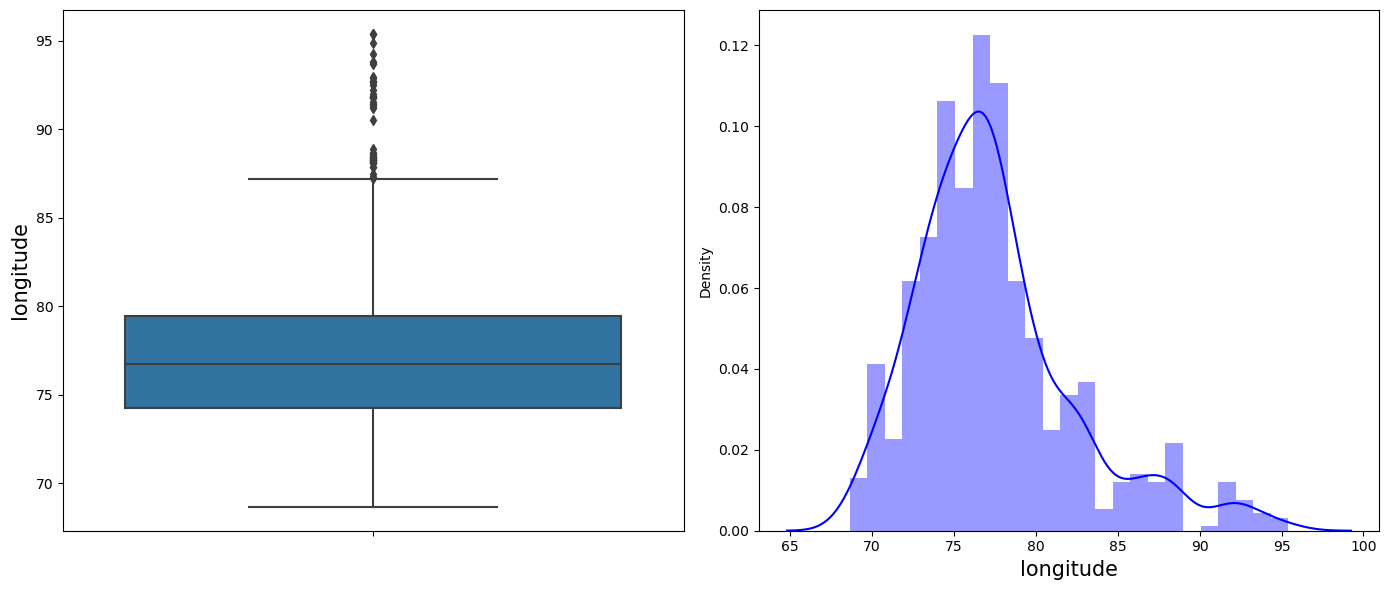

In [9]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(y='longitude',data = data)
plt.ylabel('longitude',fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(data['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

**Based on presence of outliers we will impute longitude we with median.**

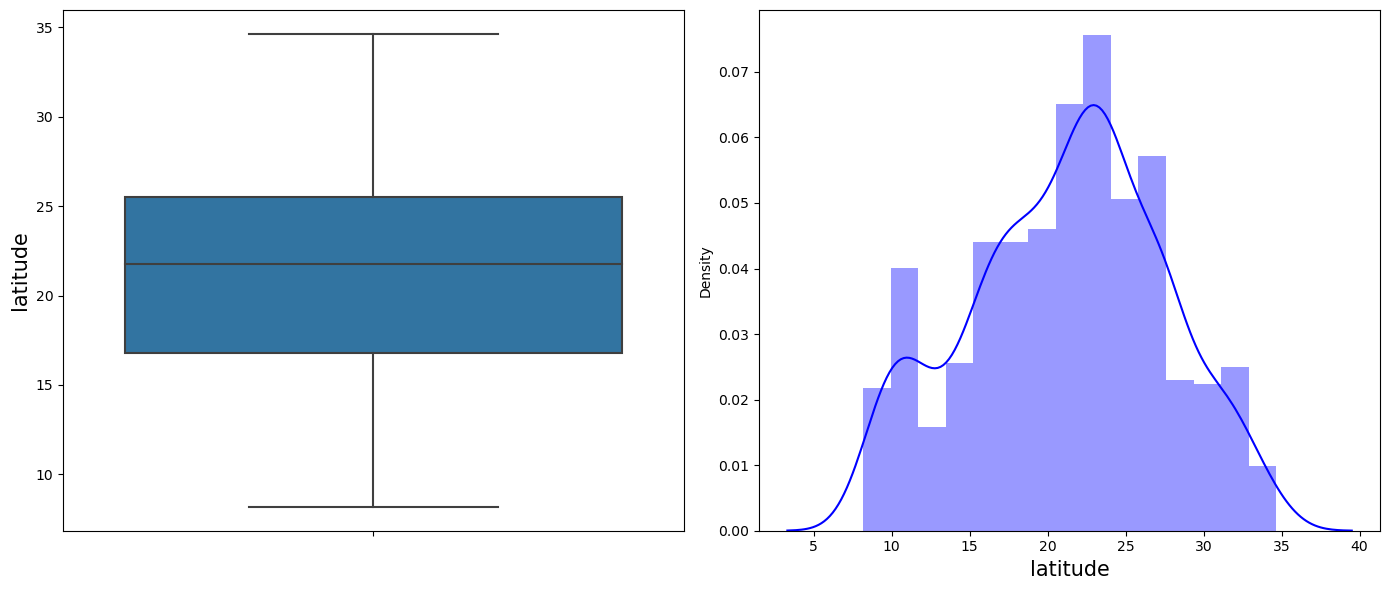

In [10]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(y='latitude',data = data)
plt.ylabel('latitude',fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(data['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

**Based on absense of outliers we will impute latitude we with mean.**

In [11]:
#Missing value imputation of geolocation with mode.
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
#Missing value imputation of longitude with median.
data['longitude'] = data['longitude'].fillna(data['longitude'].median())
#Missing value imputation of latitude with mean.
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())

In [12]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                        Missing_values  %Missing values
generation_gwh_2019                907       100.000000
generation_gwh_2013                907       100.000000
other_fuel1                        709        78.169791
generation_gwh_2014                509        56.119074
generation_gwh_2015                485        53.472988
generation_gwh_2016                473        52.149945
generation_gwh_2017                467        51.488423
generation_gwh_2018                459        50.606395
generation_data_source             458        50.496141
commissioning_year                 380        41.896362
name                                 0         0.000000
capacity_mw                          0         0.000000
source                               0         0.000000
primary_fuel                         0         0.000000
longitude                            0         0.000000
latitude                             0         0.000000
geolocation_source                   0         0

# Statstical Matrix

In [13]:
data.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          527.000000   
mean    326.223755   21.197918   77.427103         1997.091082   
std     590.085456    6.079148    4.815073           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1988.000000   
50%      59.200000   21.281800   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count                  0.0           398.000000           422.000000   
mean                   NaN          2431.823590          2428.226946   
std                    NaN          4026.440035          4194.596959   
min                    NaN             0.000000             0.000000   
25%                    NaN           223.557672           176.381063   
50%                    NaN           801.123775           711.181225   
75%                    NaN          3035.306250          3084.121250   
max                    NaN         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
count           434.000000           440.000000           448.000000   
mean           2467.936859          2547.759305          2600.804099   
std            4162.884308          4196.991169          4314.880456   
min               0.000000             0.000000             0.000000   
25%             188.285252           177.874930           193.378250   
50%             737.205450           817.977250           751.644375   
75%            3282.861313          3275.690475          3143.535900   
max           30015.000000         35116.000000         35136.000000   

       generation_gwh_2019  
count                  0.0  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

**Observation-:**

- Biggest Powerplant has power generation capicity of 4760 MW.
- In each generation-GWHours columns Mean is greater than Medians.
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
- Median of capicty MW is 60MW. This suggest that there are lot of small capicity powerplant in dataset.

**We have two different Target features for regression and classification model.LetStart exploring both Target Featres.**

# Regression Target features- Capacity

**Before visualing features let find details about Smallest & Biggest Powerplant**

In [14]:
print('Minimum Capacity of powerplant :',data.capacity_mw.min())
print('Maximum Capacity of powerplant :',data.capacity_mw.max())

Minimum Capacity of powerplant : 0.0
Maximum Capacity of powerplant : 4760.0


In [15]:
data.loc[data.capacity_mw==4760]

name  capacity_mw  latitude  longitude primary_fuel  \
880  VINDH_CHAL STPS       4760.0   24.0983    82.6719         Coal   

    other_fuel1  commissioning_year                         source  \
880         Oil              2002.0  Central Electricity Authority   

    geolocation_source  generation_gwh_2013  generation_gwh_2014  \
880                WRI                  NaN              27594.0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
880              29047.0              30015.0              35116.0   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  
880              35136.0                  NaN  Central Electricity Authority

In [16]:
data.loc[data.capacity_mw==0]

name  capacity_mw  latitude  \
829  Tata BP - Electronics City Solar Panel Plant          0.0   12.8491   

     longitude primary_fuel other_fuel1  commissioning_year  \
829    77.6752        Solar         NaN                 NaN   

                          source geolocation_source  generation_gwh_2013  \
829  Tata BP Solar India Limited     Industry About                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
829                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
829                  NaN                  NaN                  NaN   

    generation_data_source  
829                    NaN

**Observation-:**

- Biggest powerplant in india as per database is VINDH_CHAL STPS with power generation capicity of 4760 MW.As name suggest is Thermal powerplant with coal as primary with coal as primary Fuel and alternate fuel is oil. it is commision in year 2002.
- Smallest powerplant is mentioned as Tata BP- Electronics City Solar Panel Plant with capicity of 0 MW.**This Must be data entry errors as if powerplant is commision it cannot have capacity of 0 MW.**


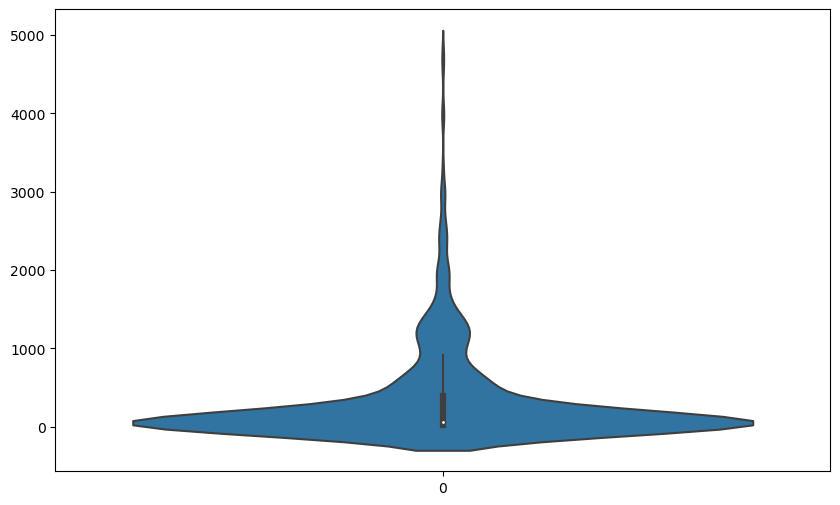

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data['capacity_mw'])
plt.show()

We can see there are very powerplant of capicity more than 1500 MW.Let check

In [18]:
data.loc[data.capacity_mw > 1500].shape

(39, 17)

**There are only 17 powerplant of capacity more than 1500 MW.**

In [19]:
pd.crosstab(data['capacity_mw'],data['primary_fuel'],margins=True).T.style.background_gradient(cmap='summer_r')

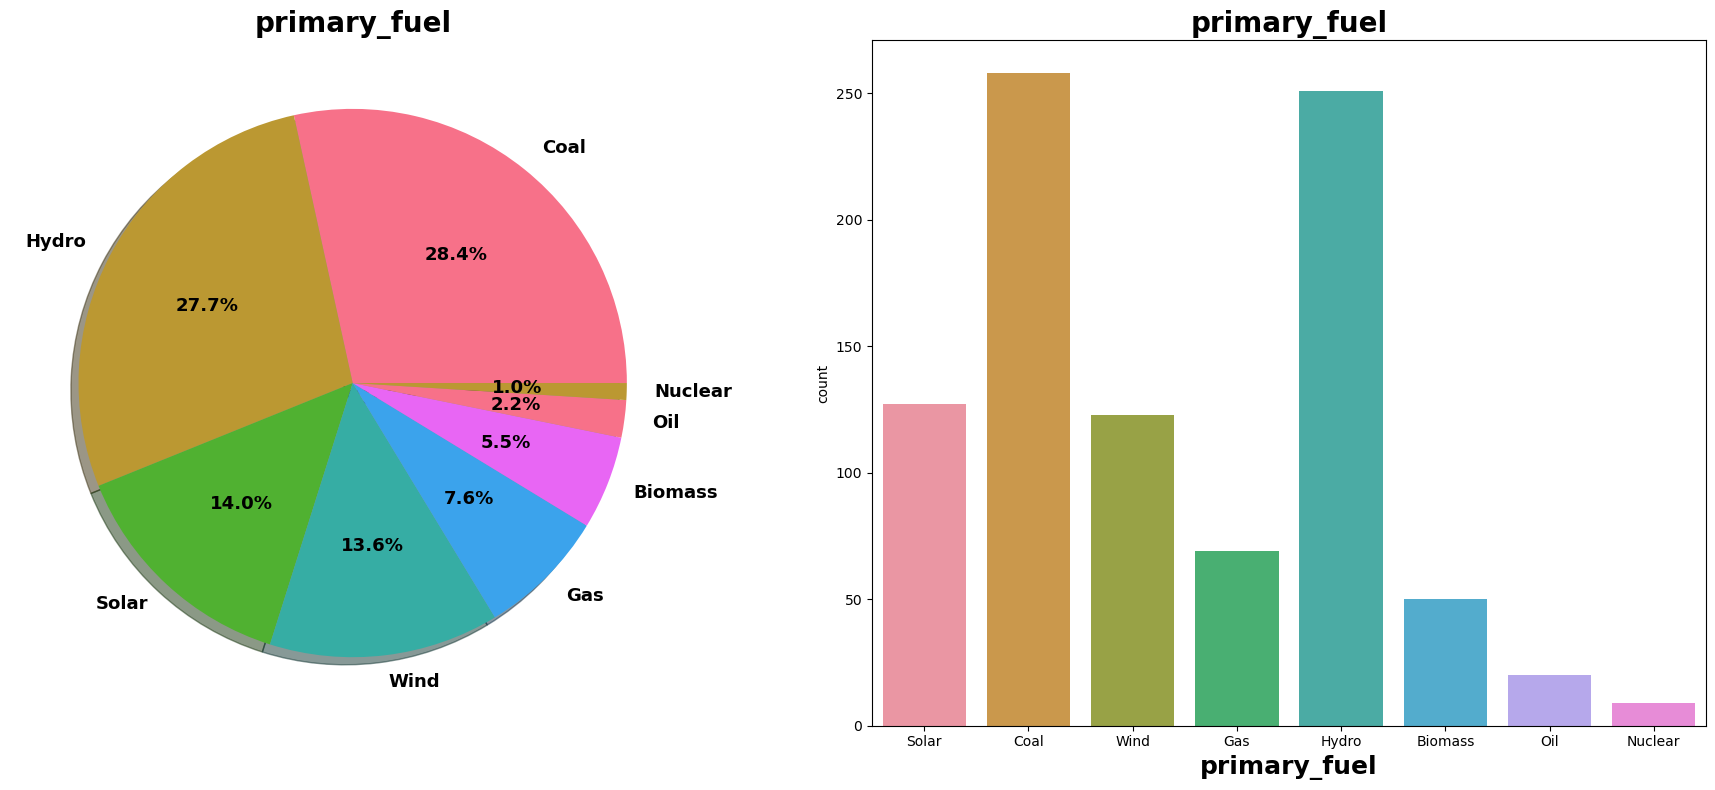

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontweight': 'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('primary_fuel',fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel', data=data,ax=ax[1])
ax[1].set_title('primary_fuel', fontsize=20,fontweight='bold')
ax[1].set_xlabel("primary_fuel", fontsize=18, fontweight='bold')
plt.show()

In [21]:
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

**Observation-:**

- Maximum Numbers of powerplant are coal based powerplant followed by hydro energy based powerplants.
- Around 40% powerplant are Unconventional powerplant mainly based on Non Renewable energy resources.

Now let check sector wise capacity.

In [22]:
data['capacity_mw'].groupby(data["primary_fuel"]).agg([sum])

sum
primary_fuel            
Biomass         1003.260
Coal          205839.220
Gas            25172.506
Hydro          46441.770
Nuclear         8780.000
Oil             1778.840
Solar           2757.500
Wind            4111.850

**Observation-:**

**Out of Total powergeneration maximum comes from coal.**

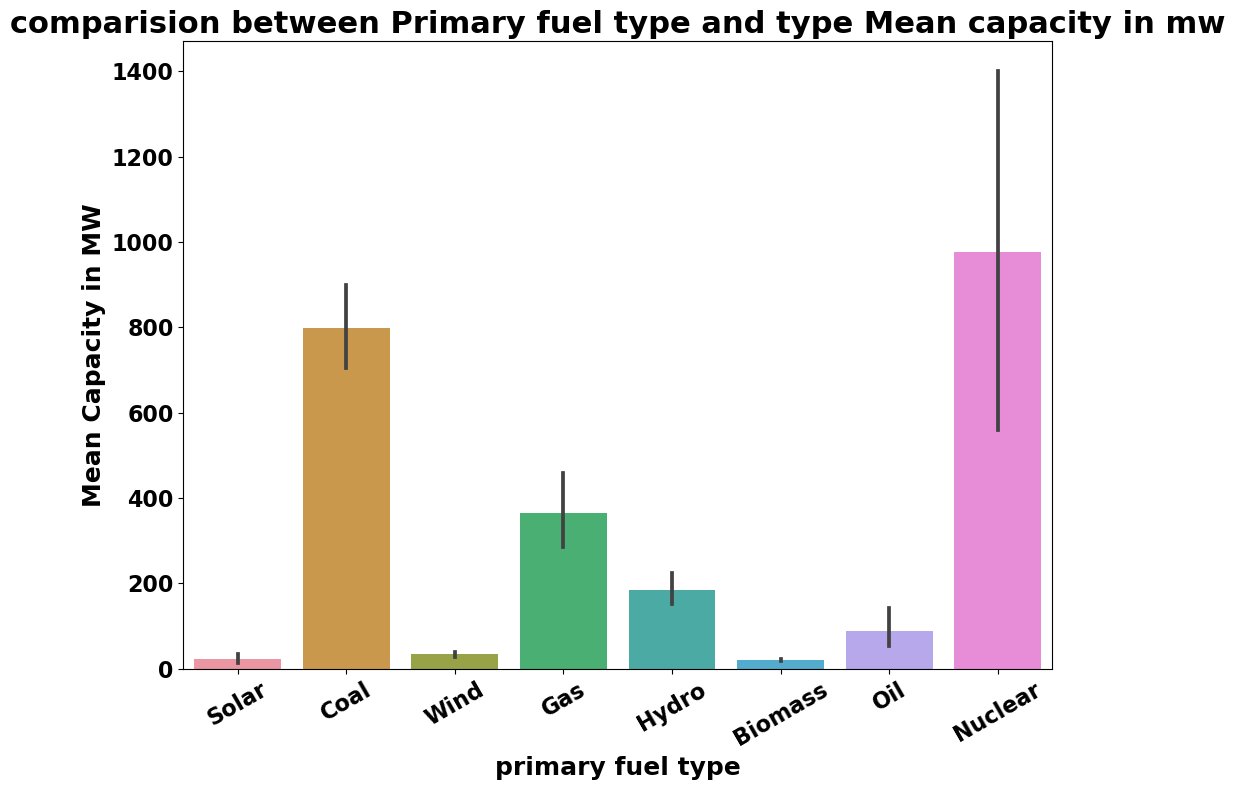

In [23]:
#Lets check the relation between primary_fuel and Average Capacity_mw
plt.figure(figsize=(10,8))
y = data["capacity_mw"]
p = sns.barplot(x= 'primary_fuel', y ='capacity_mw', data = data)
plt.title('comparision between Primary fuel type and type Mean capacity in mw',fontsize=22, fontweight='bold')
p.set_xlabel('primary fuel type', fontsize=18,fontweight='bold')
p.set_ylabel('Mean Capacity in MW', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=30)
plt.yticks(fontsize=16,fontweight = 'bold')
plt.show()

**Above result is obvious as only 9 Nuclear powerplant so its means Capacity is higher.**

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

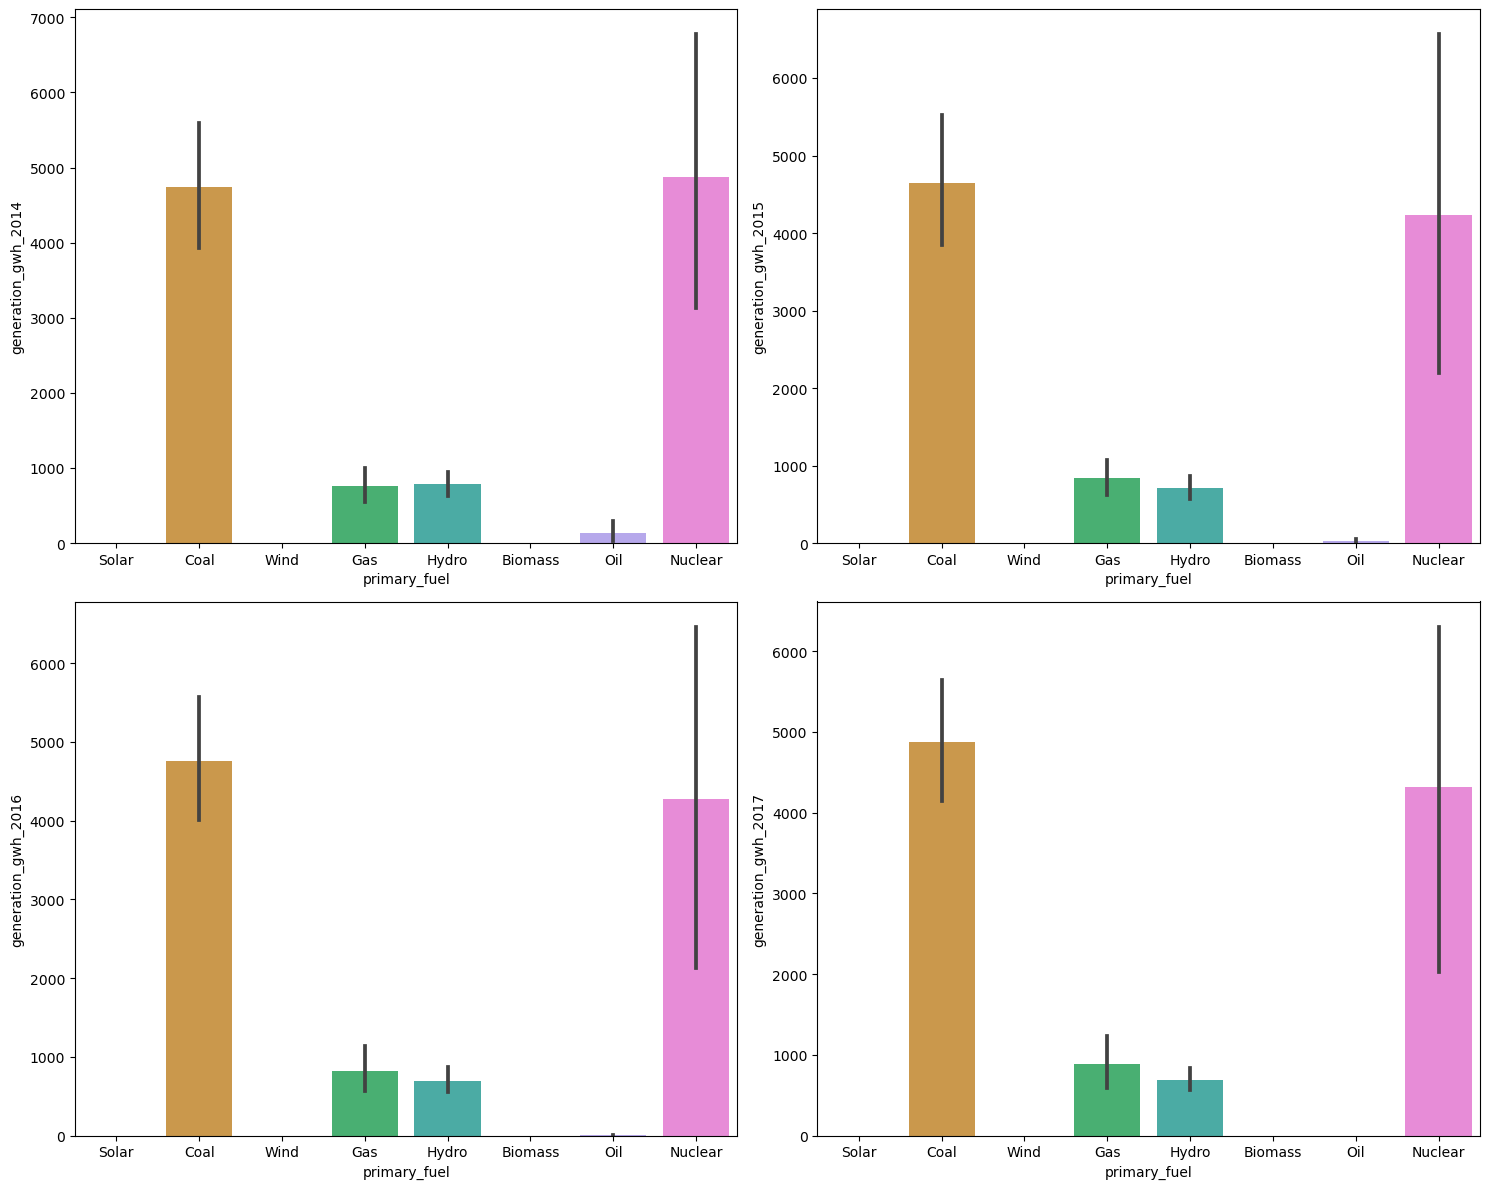

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel', y = 'generation_gwh_2014', ax=axes[0,0],data=data)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel', y = 'generation_gwh_2015', ax=axes[0,1],data=data)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel', y = 'generation_gwh_2016', ax=axes[1,0],data=data)

# Checking generation growth in 2017
sns.barplot(x='primary_fuel', y = 'generation_gwh_2017', ax=axes[1,1],data=data)

# Location V/S Primary Fuel

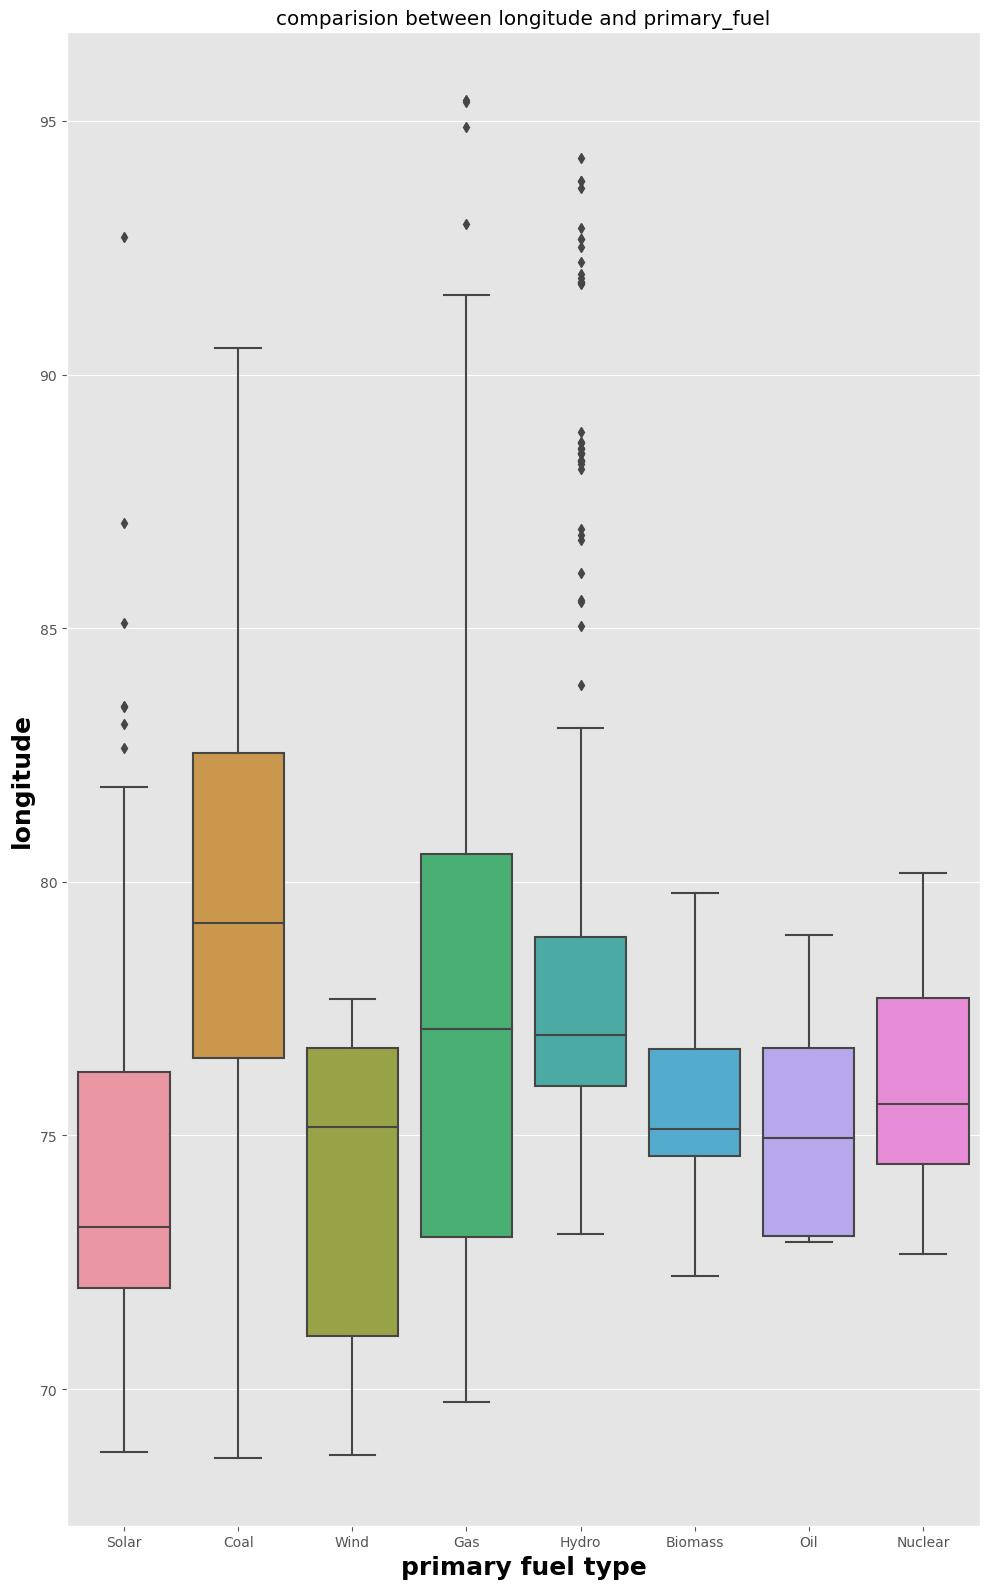

In [25]:
plt.figure(figsize=[10,16])
plt.style.use('ggplot')
plt.title('comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='longitude',data=data)
a.set_xlabel('primary fuel type', fontsize = 18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.show()

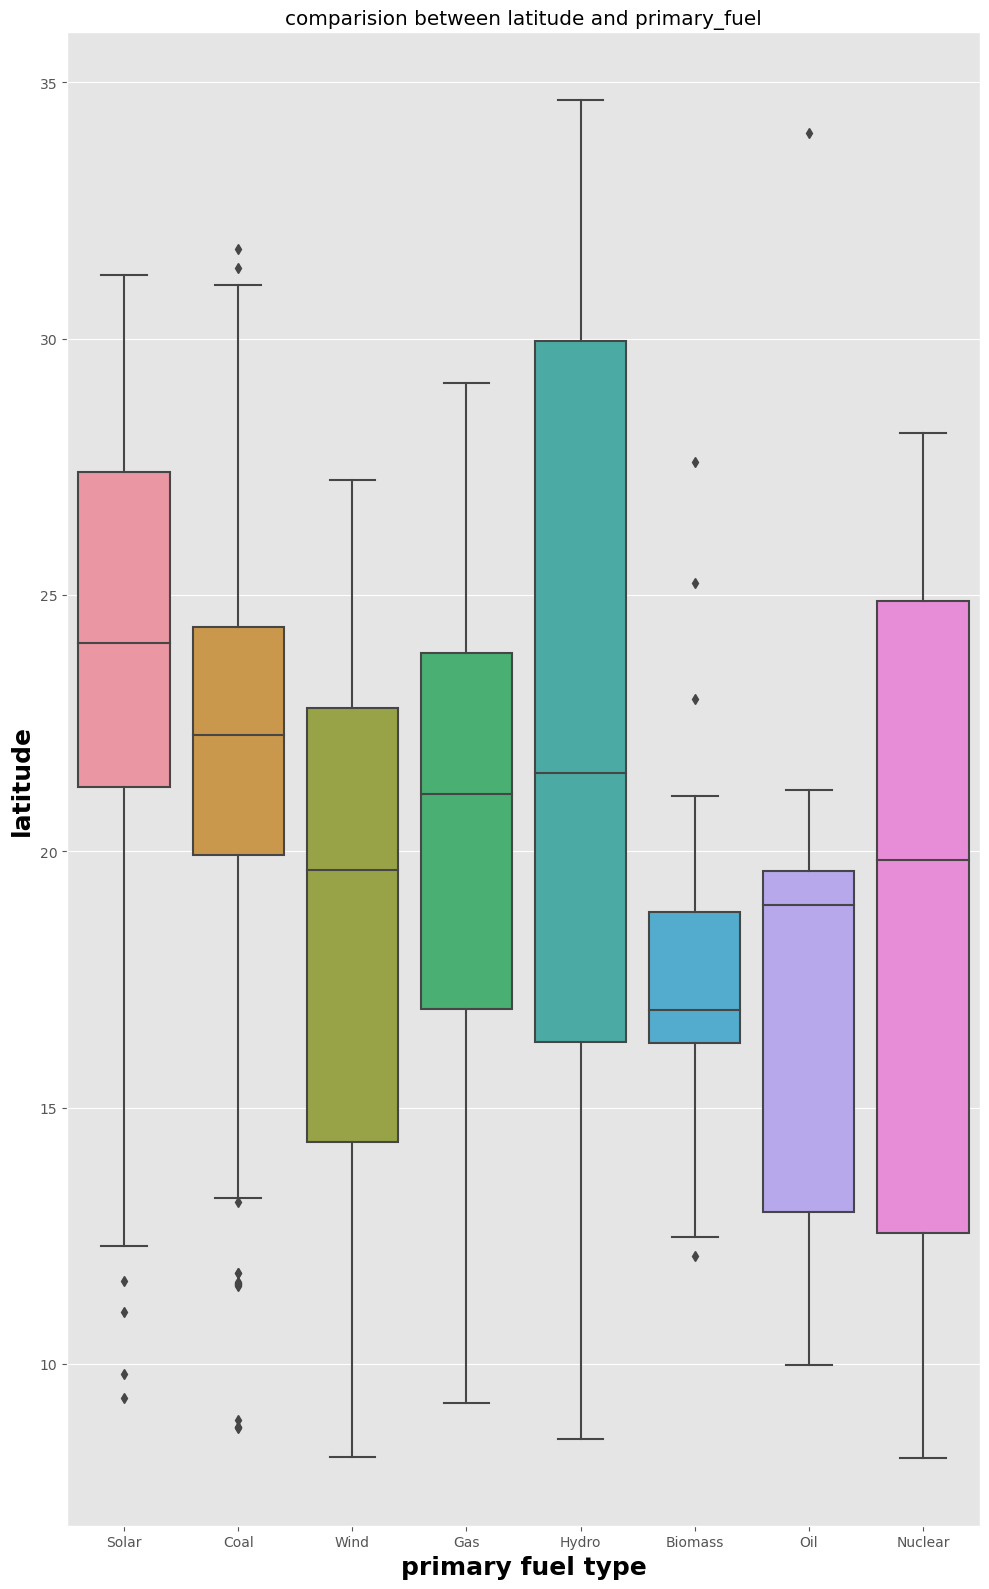

In [26]:
plt.figure(figsize=[10,16])
plt.style.use('ggplot')
plt.title('comparision between latitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='latitude',data=data)
a.set_xlabel('primary fuel type', fontsize = 18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()

**Observation-:**

- Location is important features specially for numerical powerplants. These plants lies in between 15 to 25 latitude and longitude range of 75 to 88 degree.
- We can also see solar powerplant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

# Location V/S Capacity

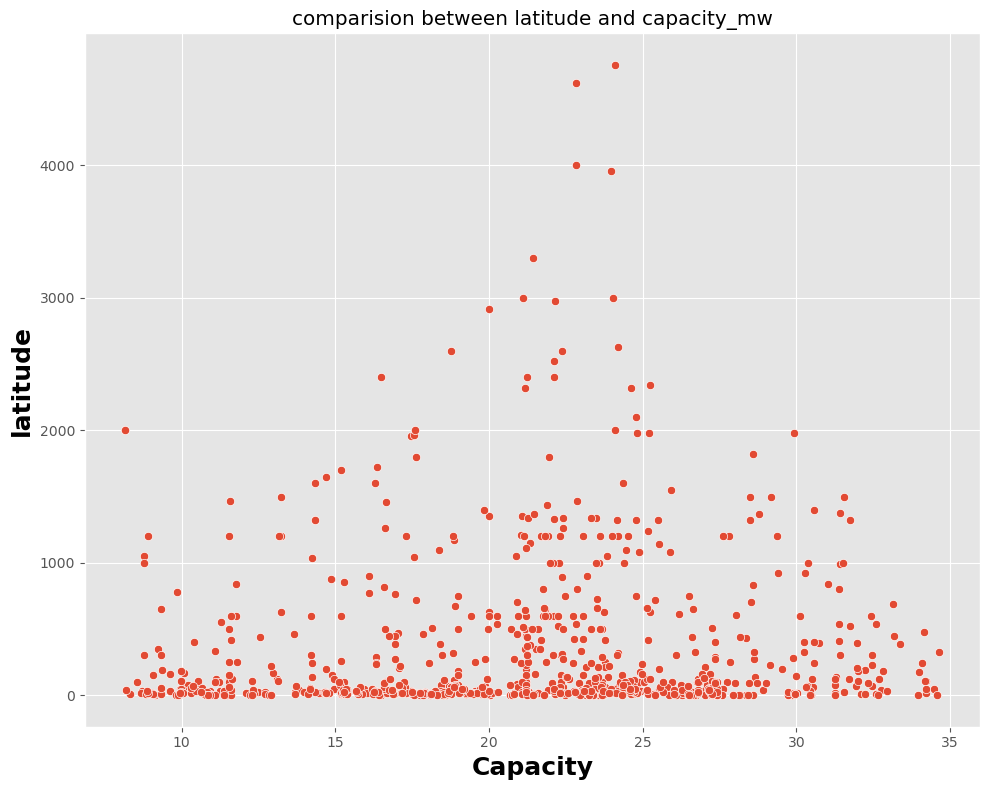

In [27]:
plt.figure(figsize=[10,8])
plt.style.use('ggplot')
plt.title('comparision between latitude and capacity_mw')
a = sns.scatterplot(x='latitude',y='capacity_mw',data=data)
a.set_xlabel('Capacity', fontsize = 18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()

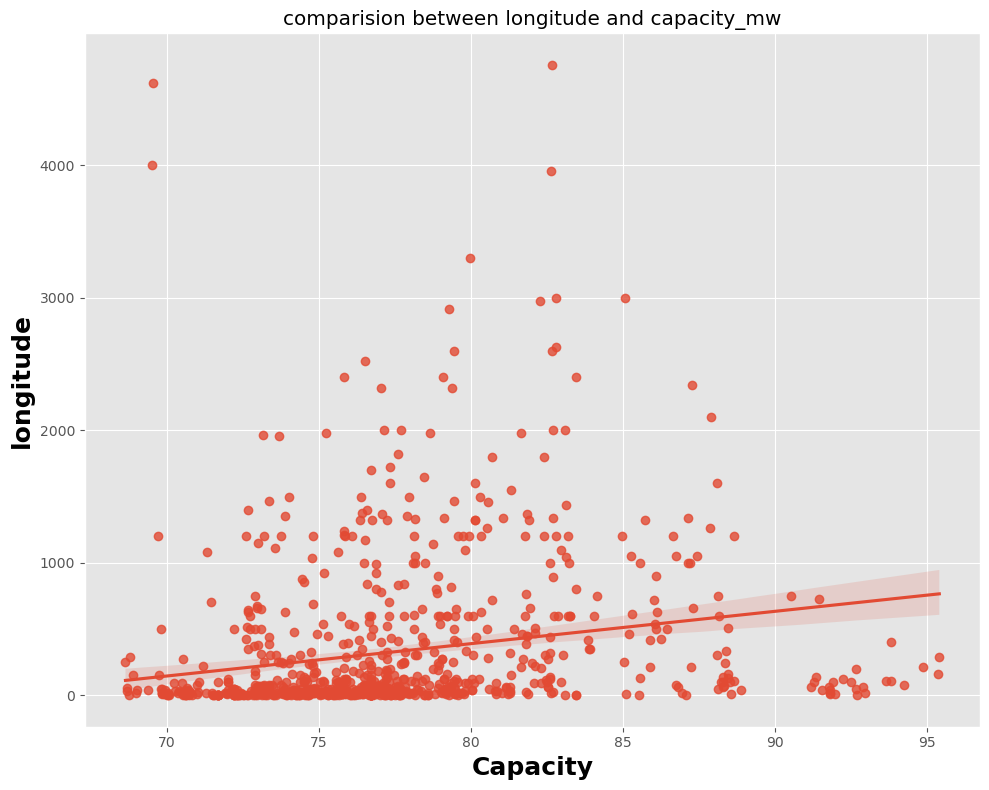

In [28]:
plt.figure(figsize=[10,8])
plt.style.use('ggplot')
plt.title('comparision between longitude and capacity_mw')
a = sns.regplot(x='longitude',y='capacity_mw',data=data)
a.set_xlabel('Capacity', fontsize = 18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.show()

**Nothing Significant insight gain from above plots**

# Commision age v/s primary fuel

In [29]:
# Let's extract power plant age from commisioning year by subtracting it from the years 2018
data['power_plant_age'] = 2018 - data['commissioning_year']
data.drop(columns=['commissioning_year'],axis = 1, inplace = True)

In [30]:
print('The oldest powerplant Age :',data.power_plant_age.max())
print('The youngest powerplant Age :',data.power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [31]:
data.loc[data.power_plant_age==91]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
728  SIVASAMUNDRUM         42.0   12.3082     77.165        Hydro         NaN   

                            source geolocation_source  generation_gwh_2013  \
728  Central Electricity Authority                WRI                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
728            220.82035             215.3777             144.4143   

     generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
728            175.92595            282.76905                  NaN   

            generation_data_source  power_plant_age  
728  Central Electricity Authority             91.0

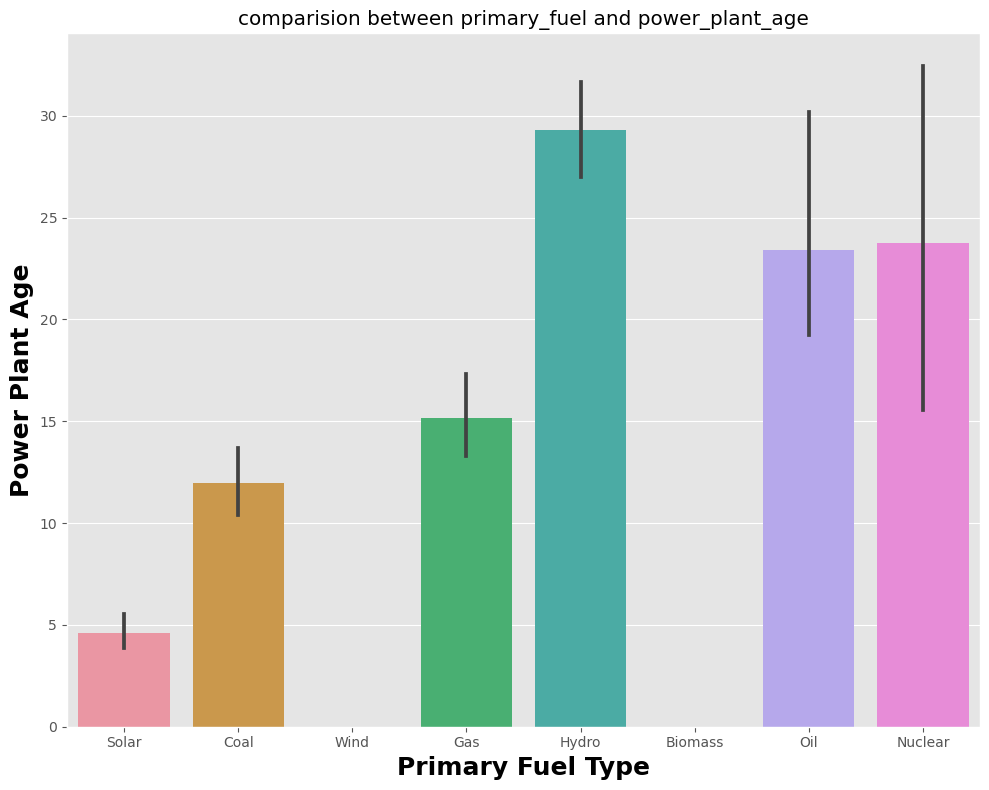

In [32]:
plt.figure(figsize=[10,8])
plt.title('comparision between primary_fuel and power_plant_age')
a = sns.barplot(x='primary_fuel',y='power_plant_age',data=data)
a.set_xlabel('Primary Fuel Type', fontsize = 18, fontweight='bold')
a.set_ylabel('Power Plant Age', fontsize=18, fontweight='bold')
plt.show()

<Axes: title={'center': 'comparision between power_plant_age and capacity_mw'}, xlabel='power_plant_age', ylabel='capacity_mw'>

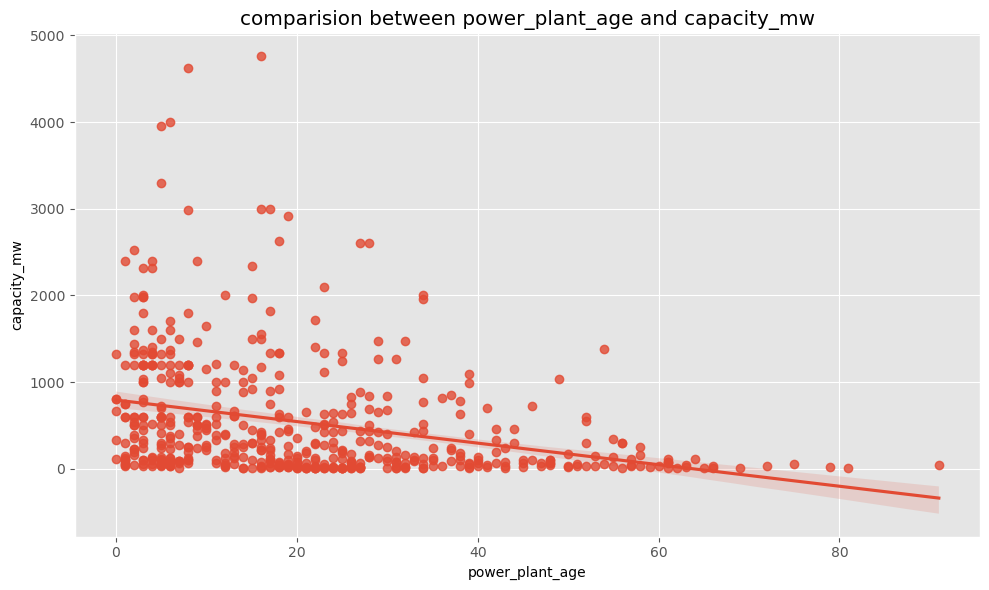

In [33]:
#Let's check how the power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('comparision between power_plant_age and capacity_mw')
sns.regplot(x='power_plant_age',y='capacity_mw',data=data)

- There is negative linear regression between features and label.
- We can say that the capacity of older plants is very less than compared to the powersplant which are stated recently.

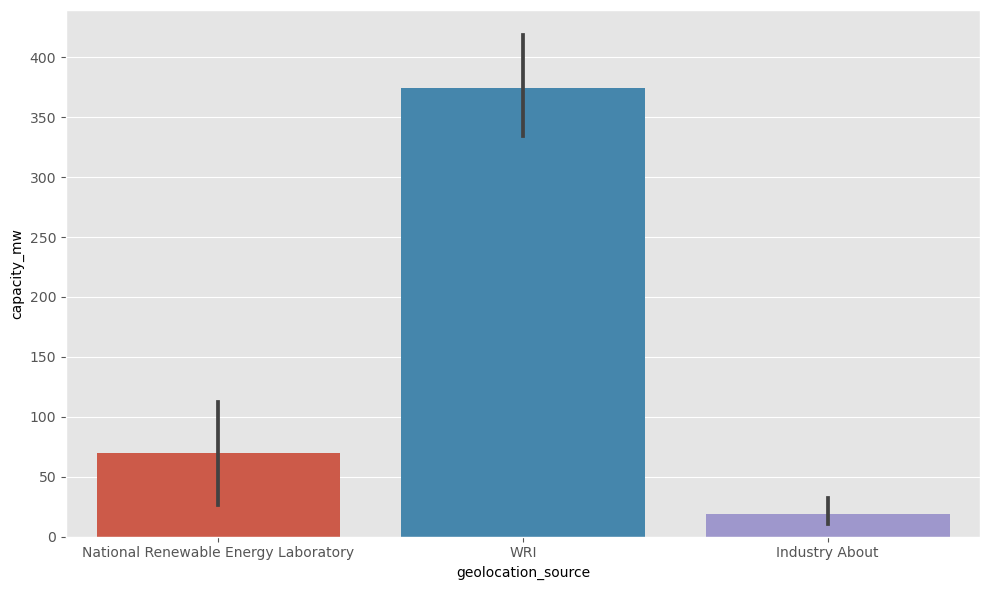

In [34]:
#Lets check the relationship between sources and capacity_mw
plt.figure(figsize=(10,6))
sns.barplot(x='geolocation_source',y= 'capacity_mw',data=data)
plt.show()

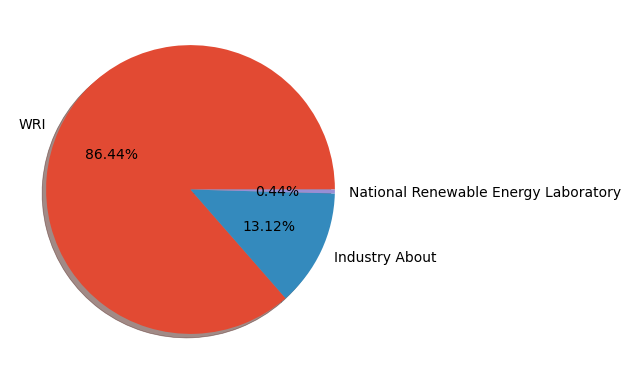

In [35]:
labels = 'WRI','Industry About','National Renewable Energy Laboratory'
fix, ax = plt.subplots(figsize=(6,5))
ax.pie(data['geolocation_source'].value_counts(), labels = labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source industry About has less capacity.

# Distribution of features

In [36]:
Numerical=['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
           'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','power_plant_age']

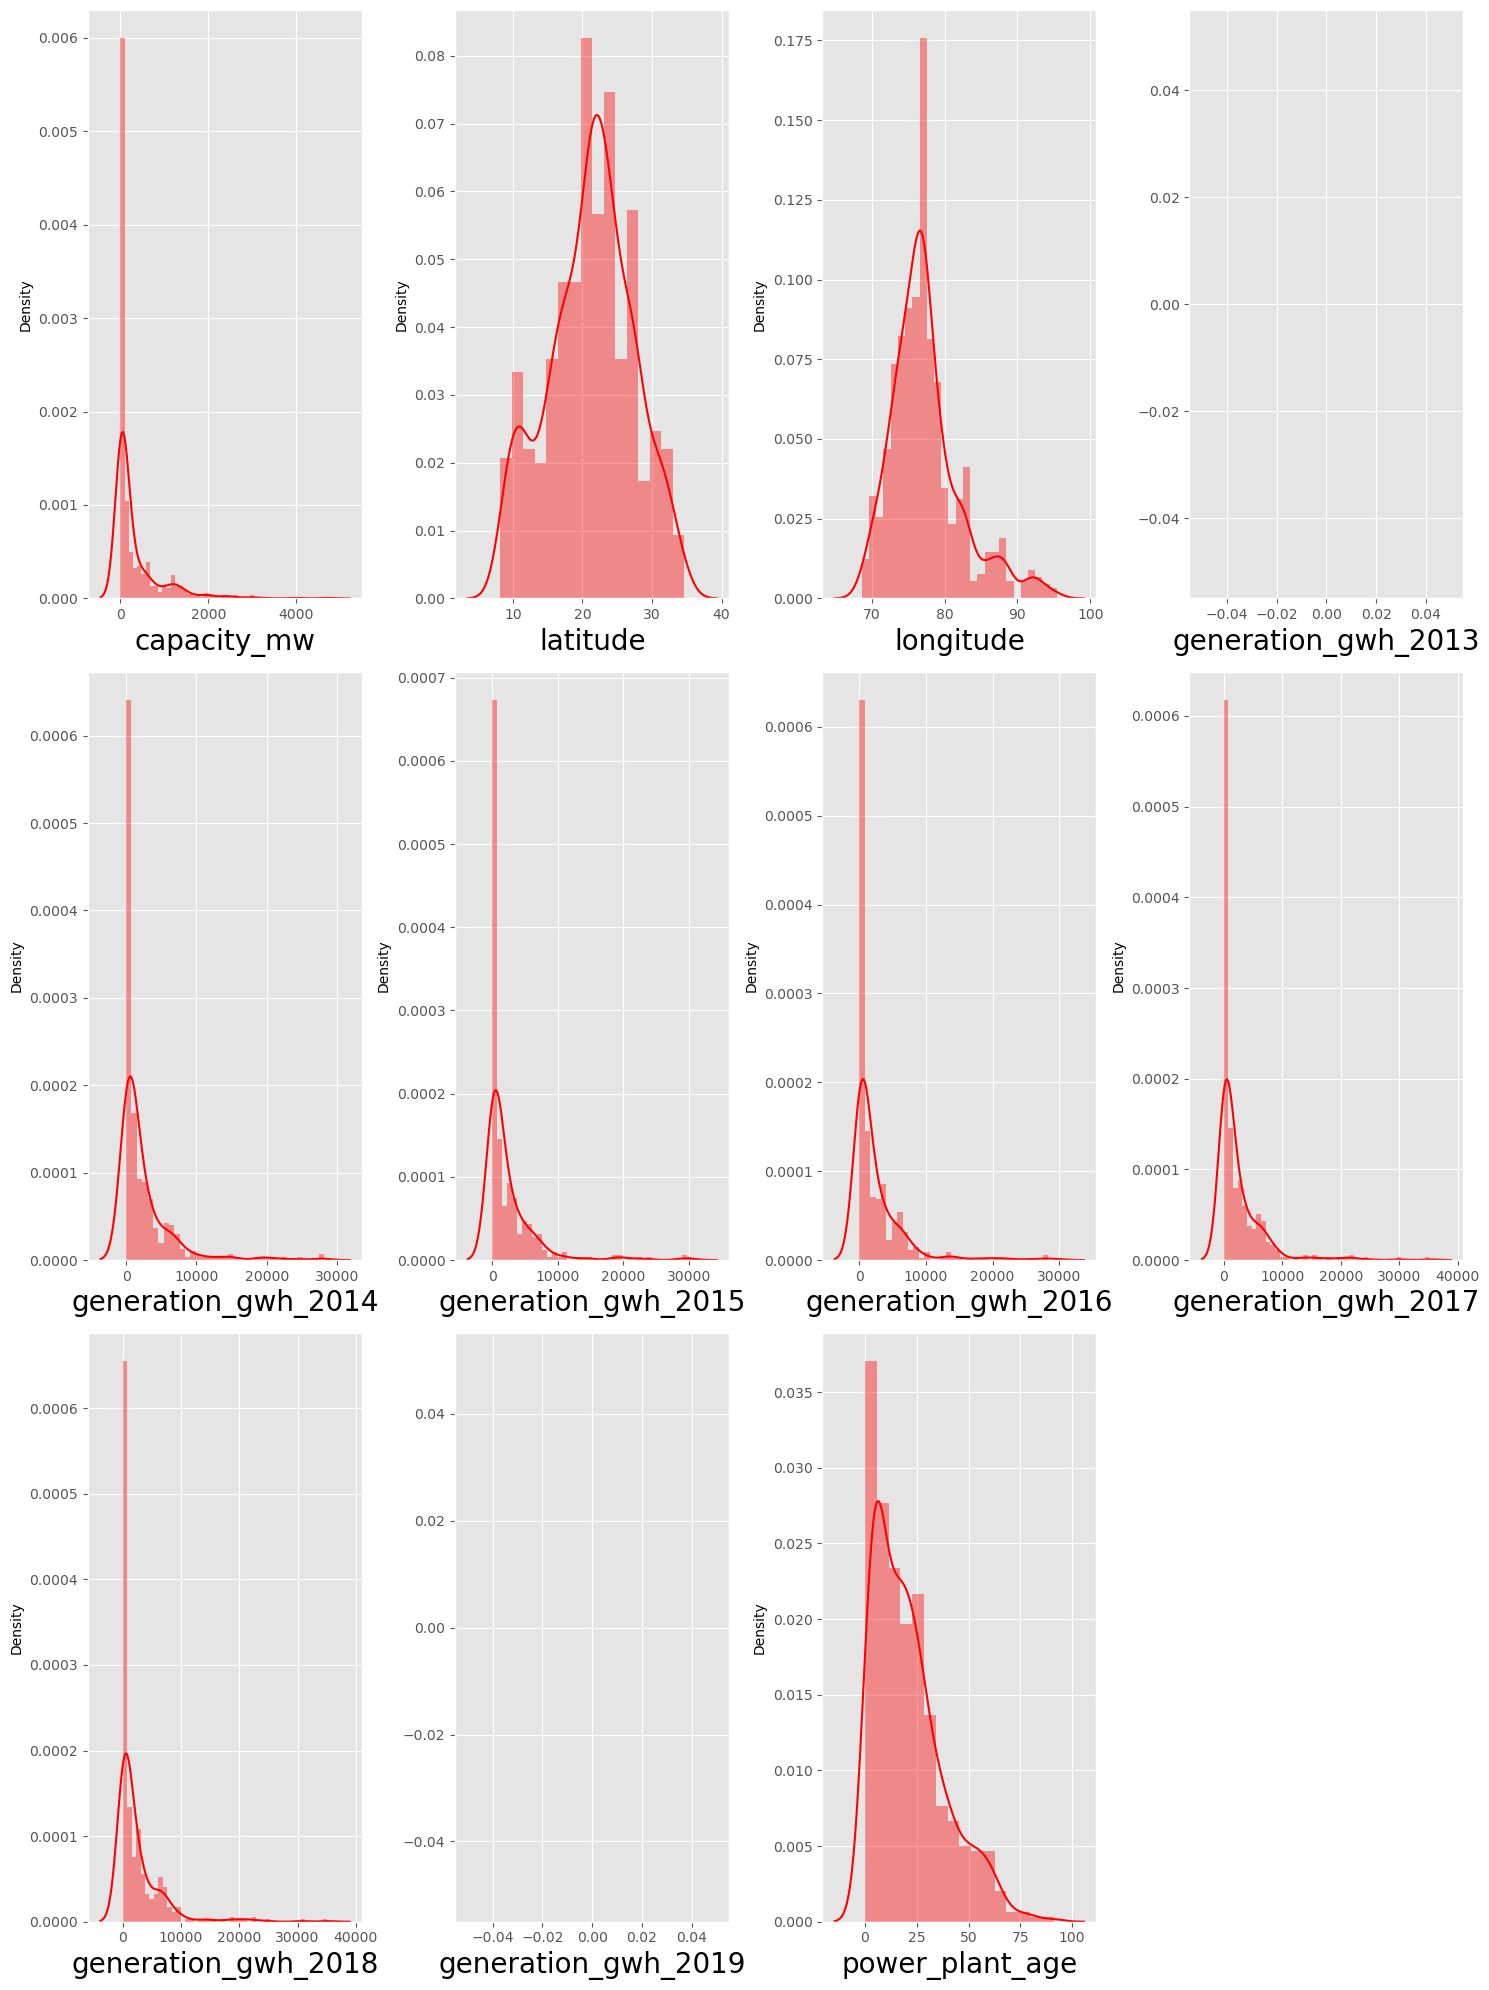

In [37]:
# checking how the data has been distributed in each column
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1
for col in Numerical:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Observation-:**

- from the above distributional we can observ that the data is not normally distributed in all the columns expect latitude and longitude.
- In most of the column the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns expect the label later.

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

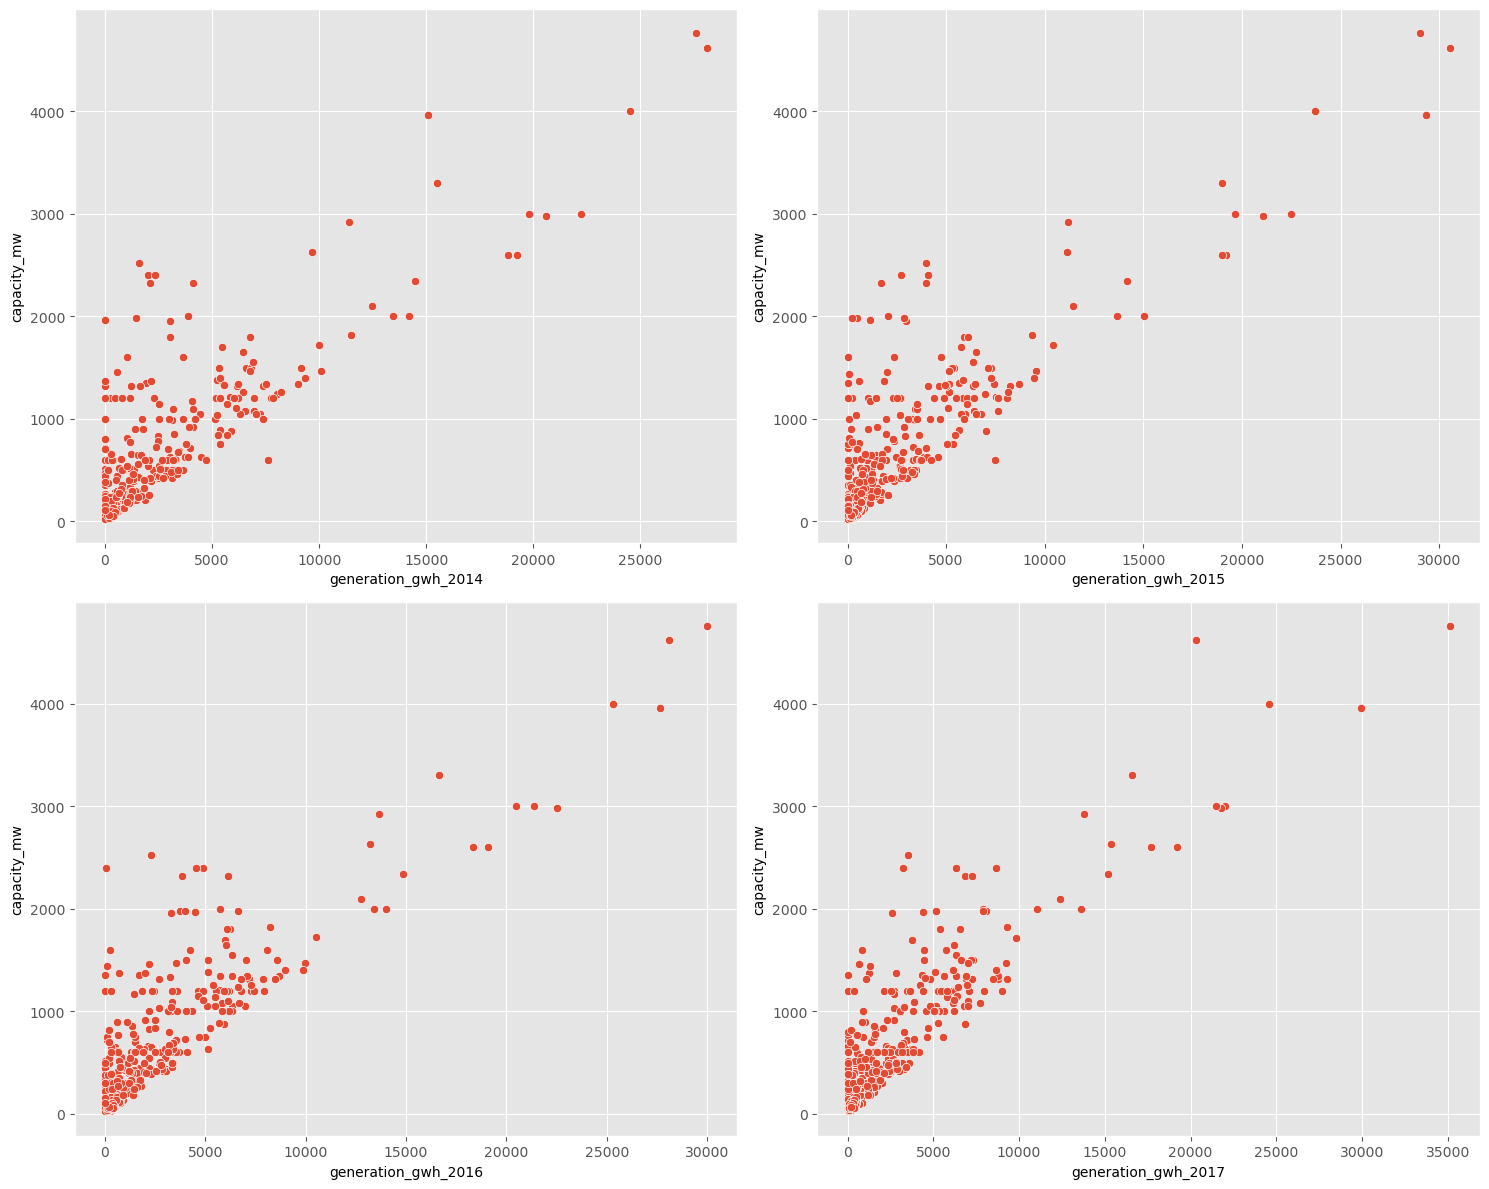

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot( x = 'generation_gwh_2014',y='capacity_mw', ax=axes[0,0],data=data)

# Checking generation growth in 2015
sns.scatterplot( x = 'generation_gwh_2015',y='capacity_mw', ax=axes[0,1],data=data)

# Checking generation growth in 2016
sns.scatterplot(x = 'generation_gwh_2016',y='capacity_mw', ax=axes[1,0],data=data)

# Checking generation growth in 2017
sns.scatterplot(x = 'generation_gwh_2017',y='capacity_mw', ax=axes[1,1],data=data)

**Observation-:**

- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- As the electricity generation growth increase, the capacity of plant also increases.

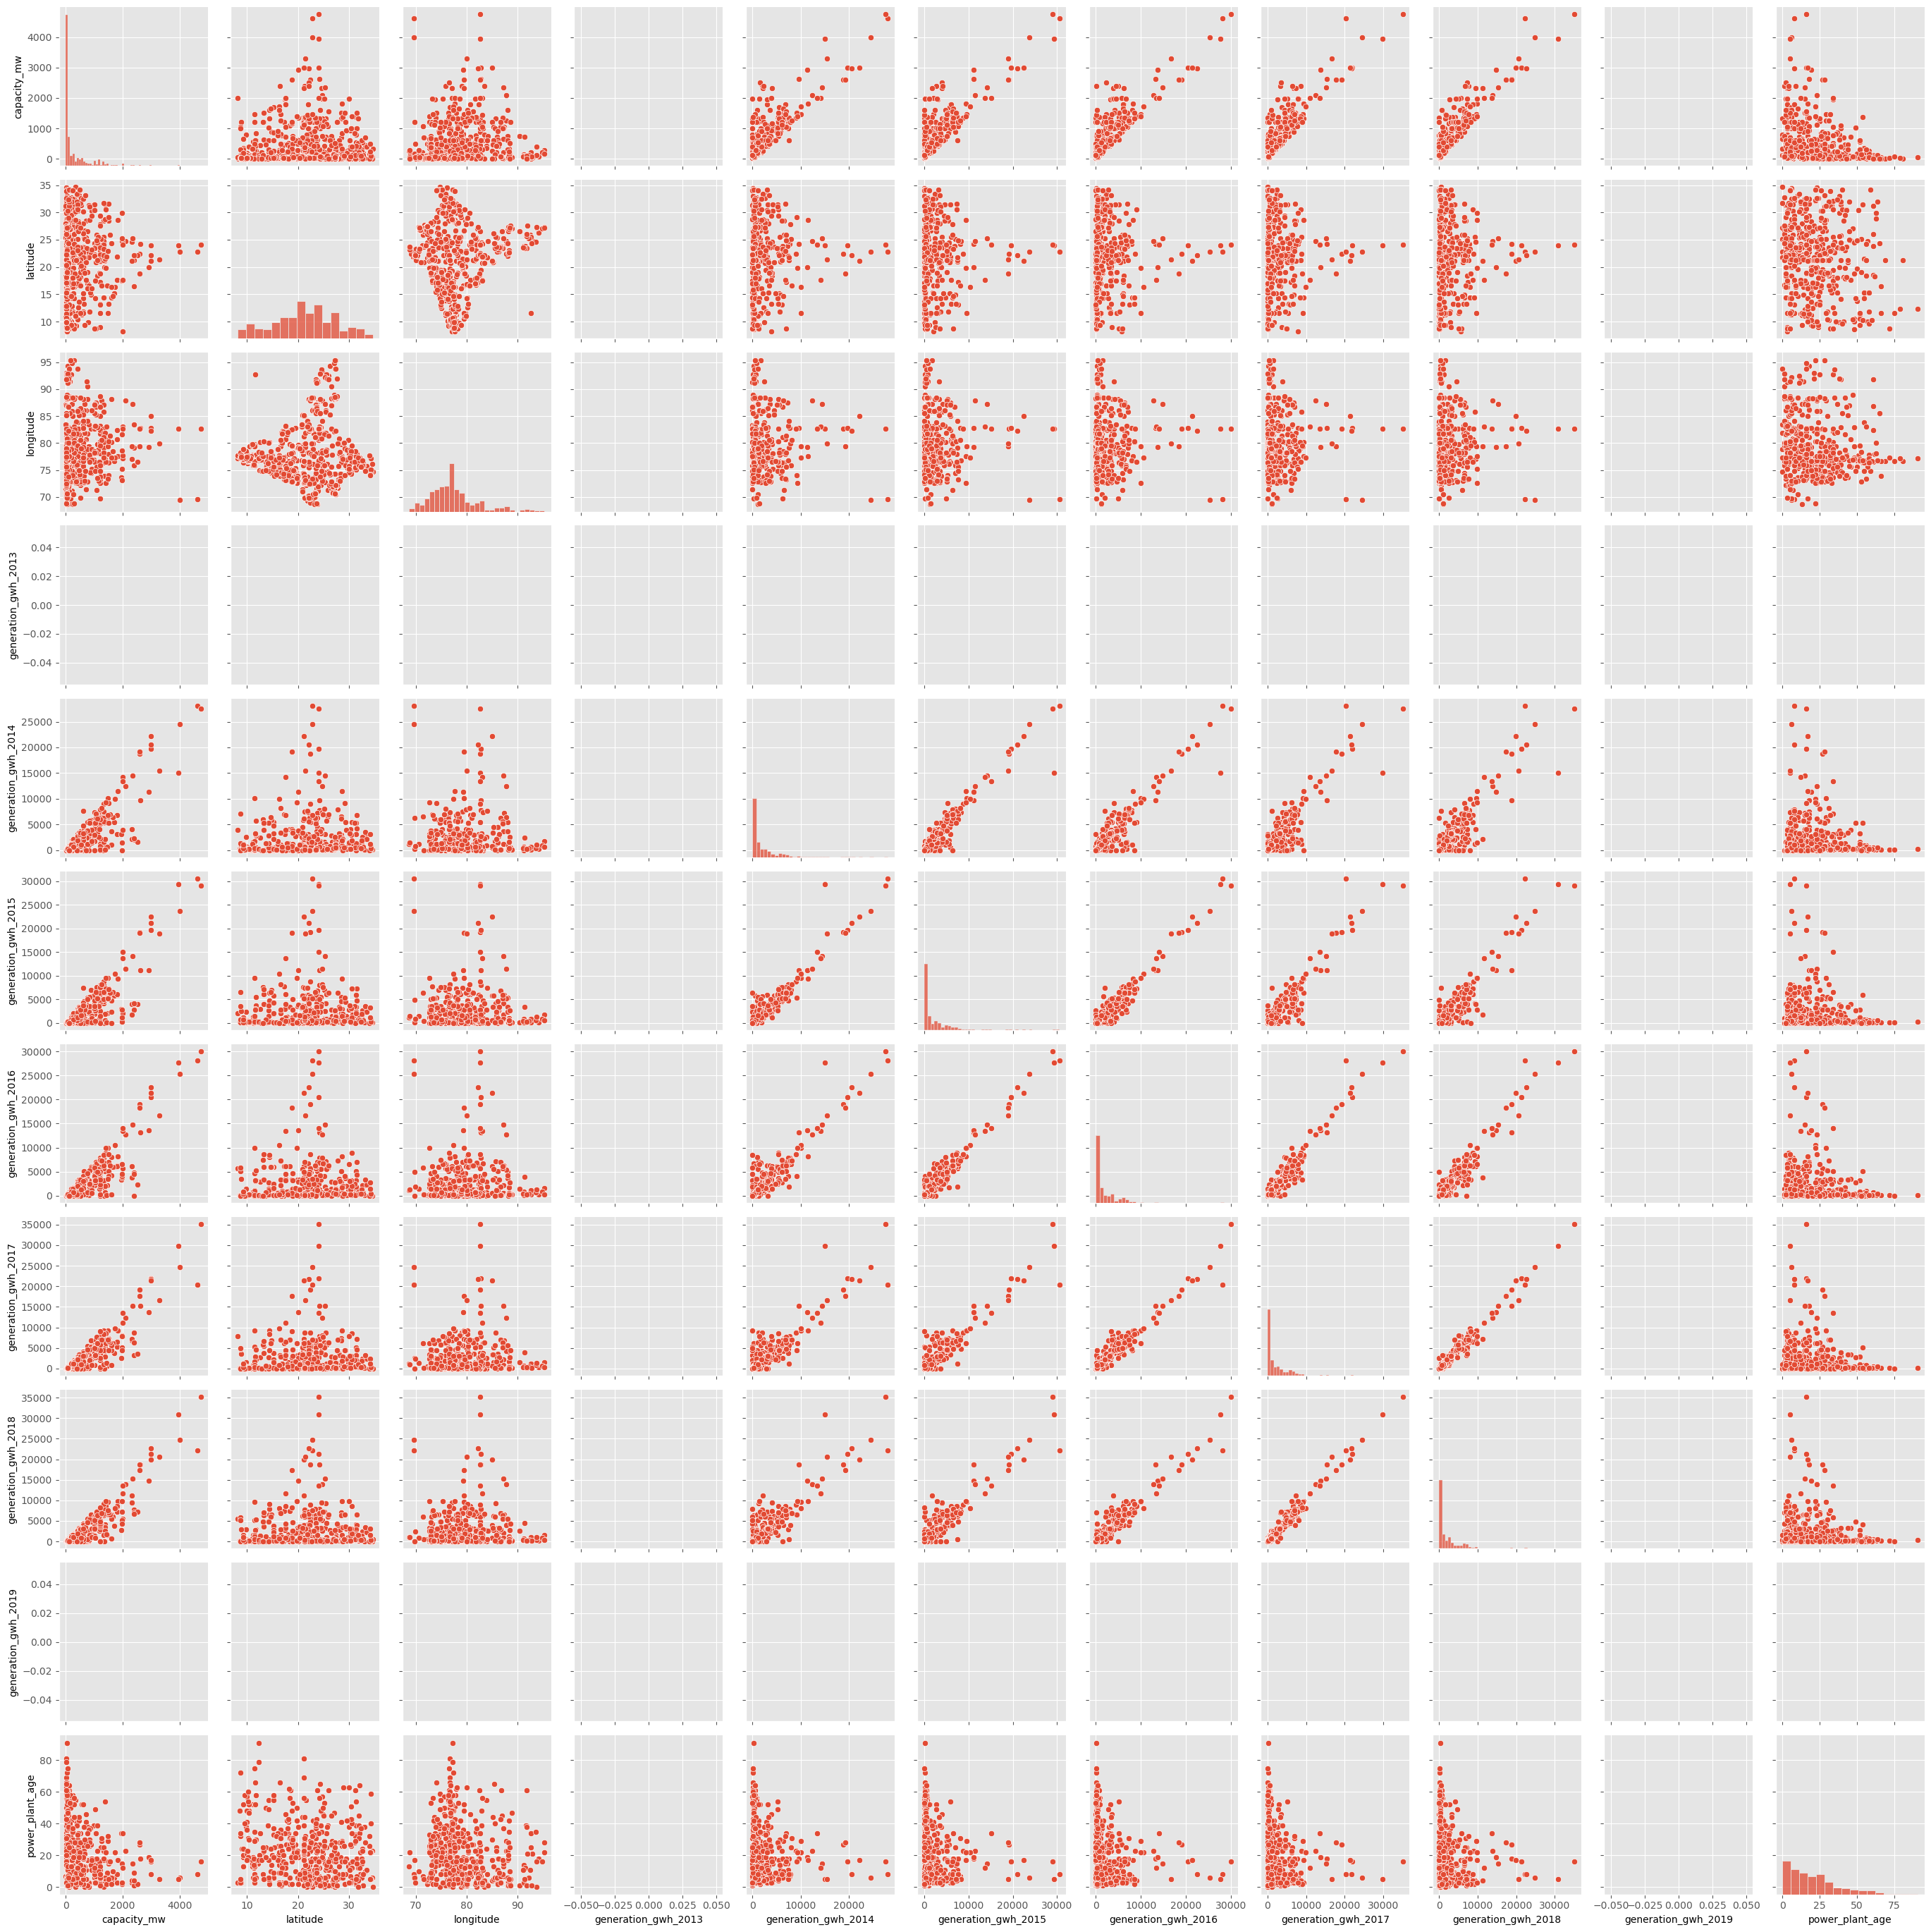

In [39]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(data)

**Observation-:**

- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can observe the outlier in some of the columns
- We can see histogram on the diagonal.

# Encoding categorical data

In [40]:
data.drop(columns = ['name'], axis = 1,inplace=True)

In [41]:
data.drop(columns=['generation_data_source'],axis=1, inplace = True)

In [42]:
category =['primary_fuel','other_fuel1','source','geolocation_source']

In [43]:
#using label encoder on target variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    data[i]=le.fit_transform(data[i])
data.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          2.5   28.1839    73.2407             6            3     109   
1         98.0   24.7663    74.6090             1            3     174   
2         39.2   21.9038    69.3732             7            3      21   
3        135.0   23.8712    91.3602             2            3      22   
4       1800.0   21.9603    82.4091             1            2      22   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0                   1                  NaN                  NaN   
1                   2                  NaN                  NaN   
2                   2                  NaN                  NaN   
3                   2                  NaN           617.789264   
4                   2                  NaN          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  generation_gwh_2019  power_plant_age  
0                  NaN                  NaN              7.0  
1                  NaN                  NaN              NaN  
2                  NaN                  NaN              NaN  
3           626.239128                  NaN             14.0  
4          7279.000000                  NaN              3.0

# Outliers detection and removal

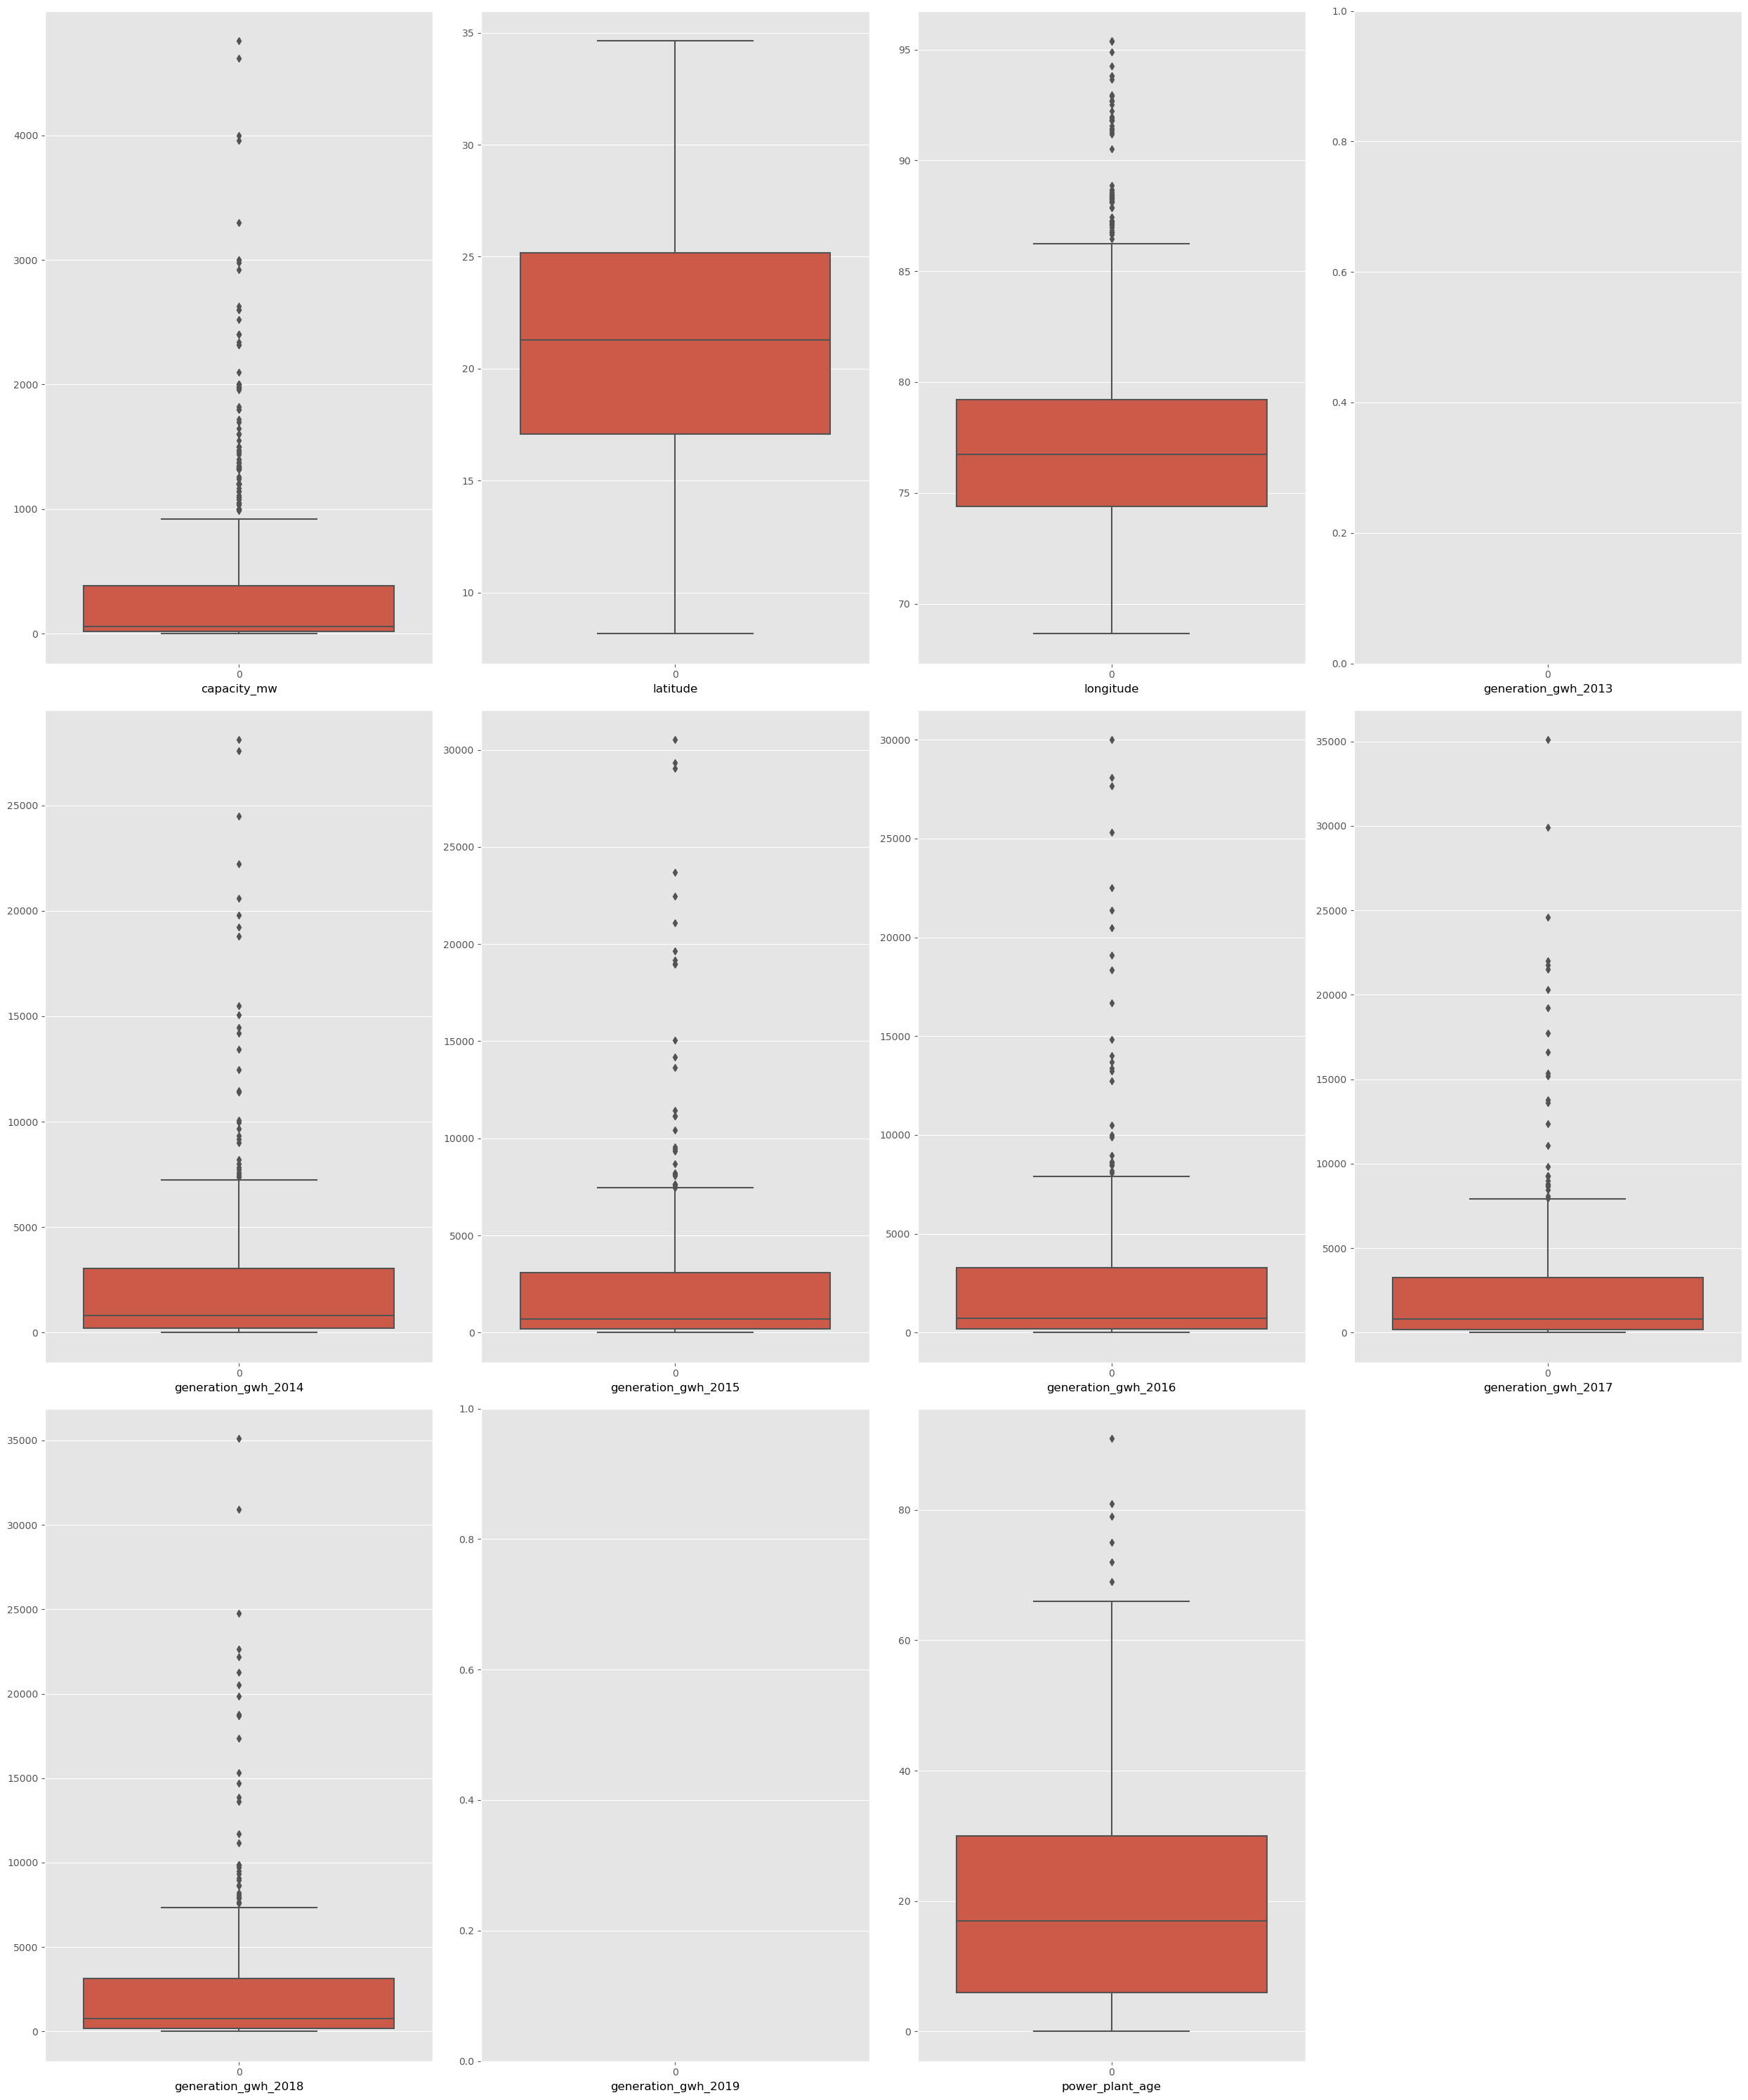

In [44]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Numerical:
    if plotnumber <=12:
        ax = plt.subplot(3,4, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

**Observation-:**

- There outliers exits in data.
- There are no outliers in lower capping level.
- So we will use Quantile-based flooring and capping techniques.

In [45]:
#removal unnecessary columns
data.drop(columns=['source','geolocation_source','generation_gwh_2013','generation_gwh_2019'], axis = 1,inplace=True)

In [46]:
da = data.copy

In [47]:
daa = data.copy()
Q1 =daa.quantile(0)
Q3 = daa.quantile(0.85)
IQR= Q3-Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
power_plant_age          39.00000
dtype: float64


In [48]:
dataa = daa[~((daa<(Q1-1.5*IQR))).any(axis=1)]
print(data.shape)

(907, 11)


# Correlation Matrix

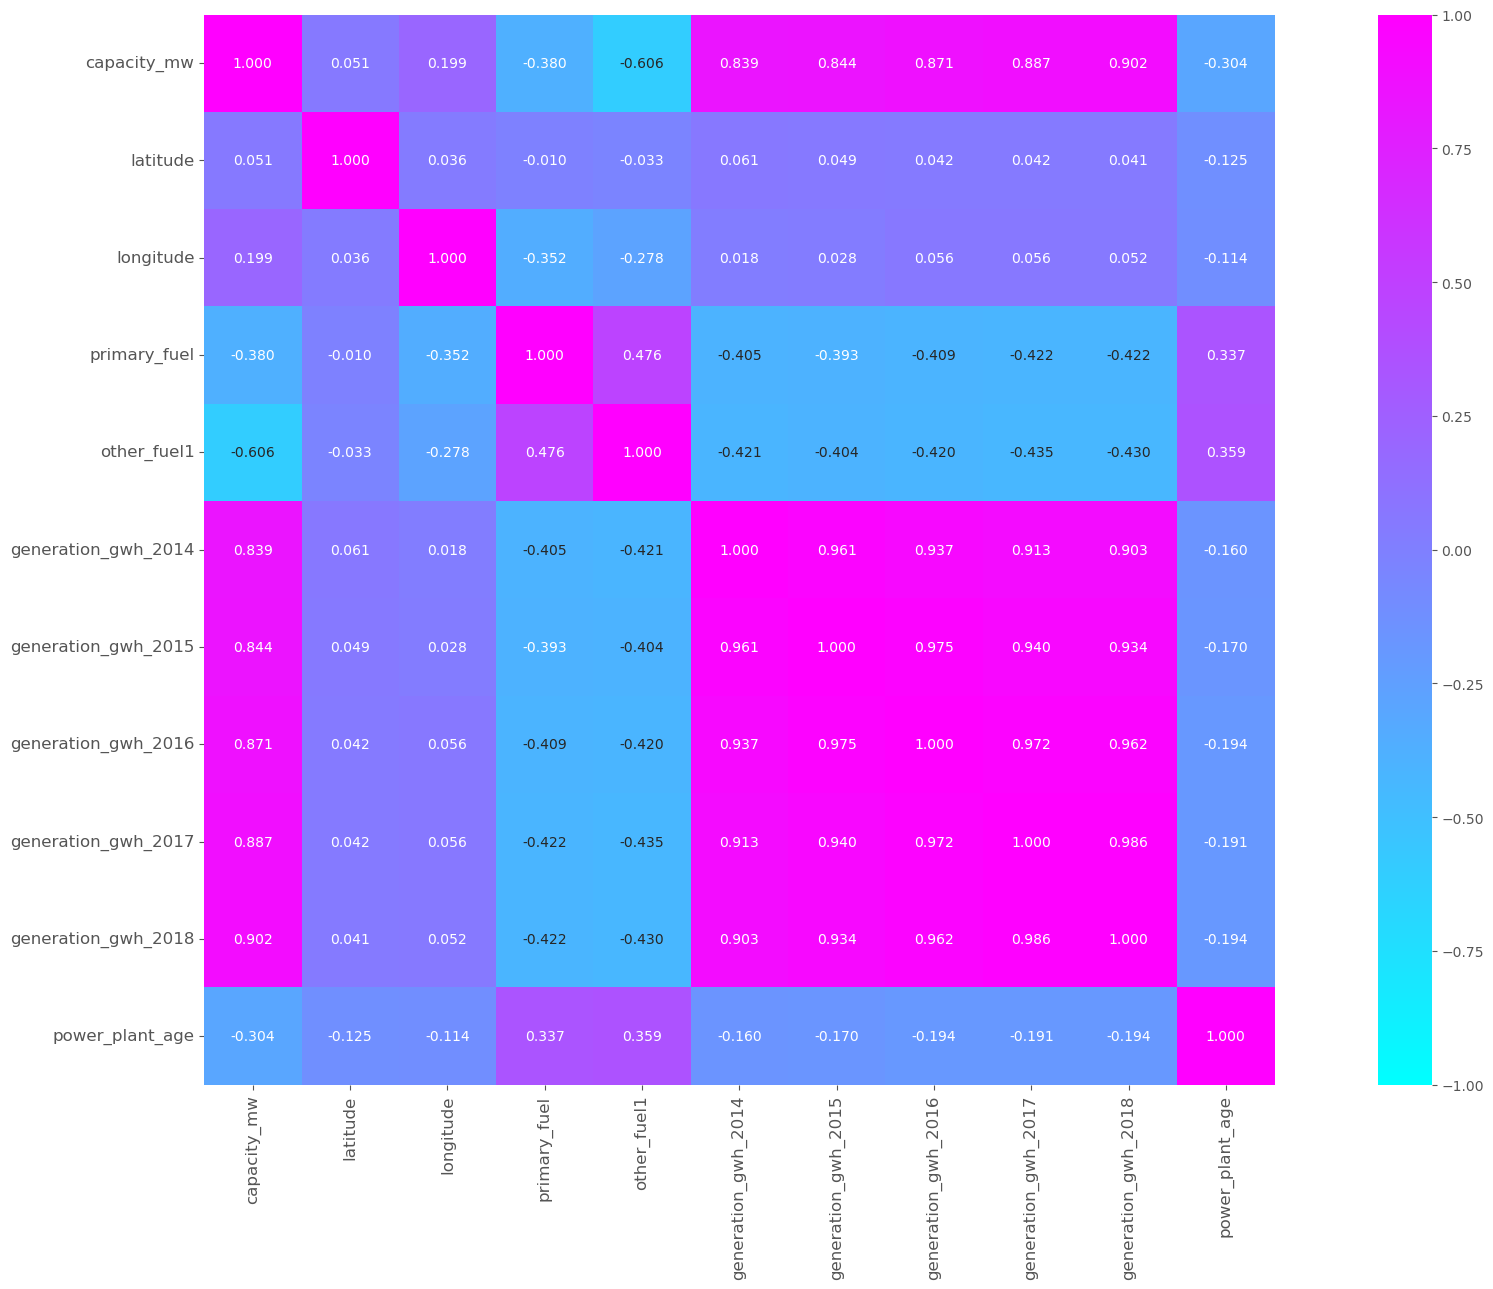

In [49]:
plt.figure(figsize=(21,13))
sns.heatmap(dataa.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**Observation-:**

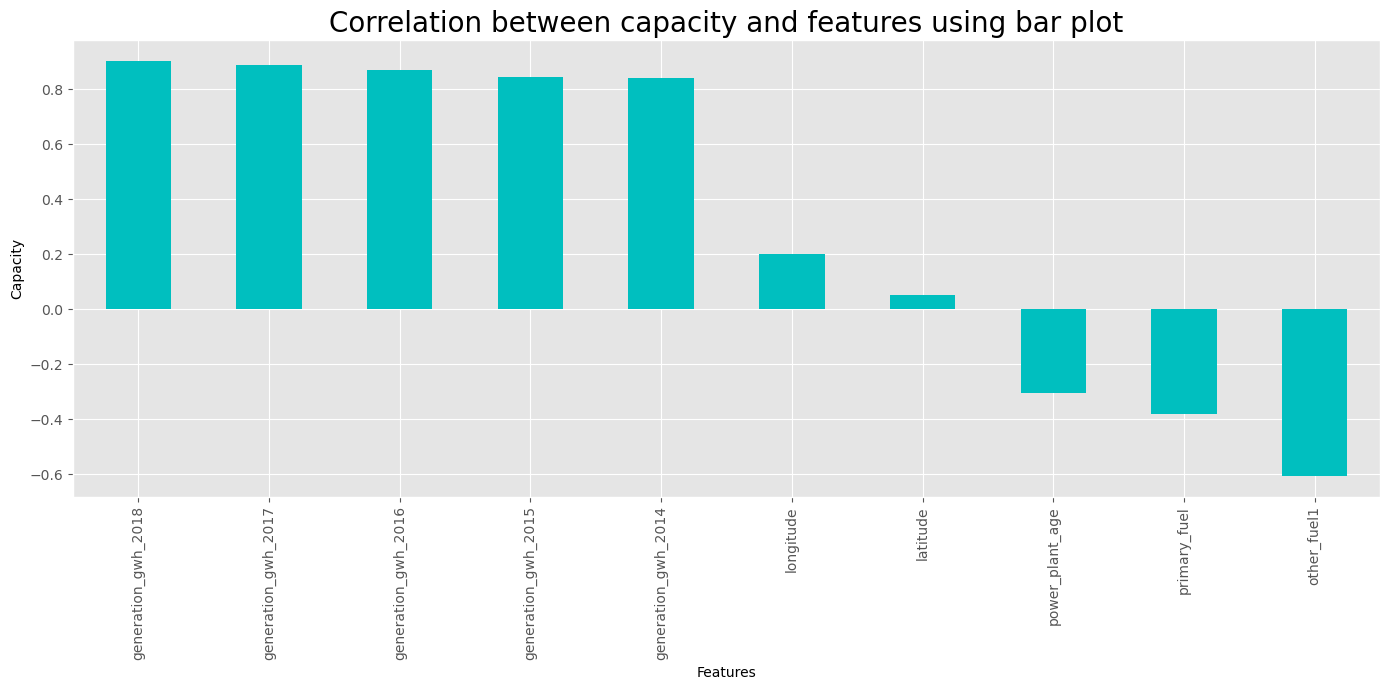

In [50]:
plt.figure(figsize=(14,7))
dataa.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize = 10)
plt.title('Correlation between capacity and features using bar plot', fontsize = 20)
plt.show()

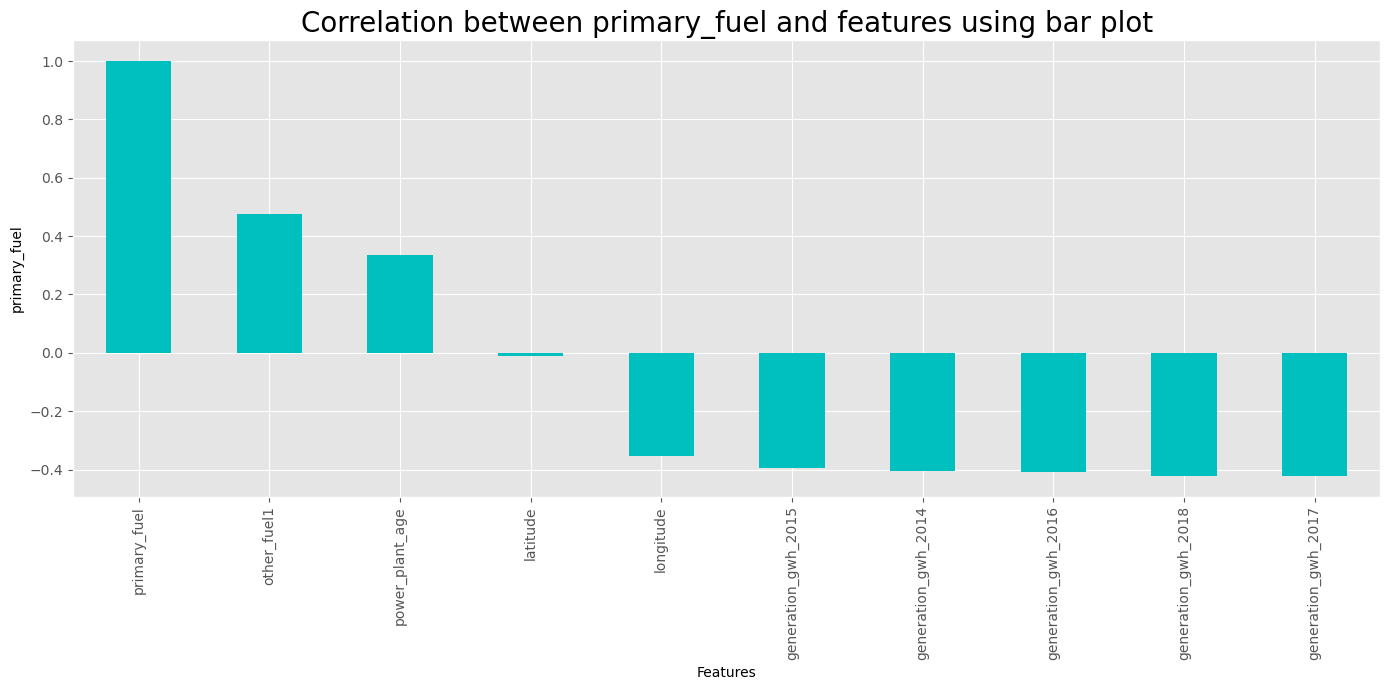

In [51]:
plt.figure(figsize=(14,7))
dataa.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize = 10)
plt.title('Correlation between primary_fuel and features using bar plot', fontsize = 20)
plt.show()

# Skewness

In [52]:
dataa.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
other_fuel1           -1.626786
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
power_plant_age        1.067949
dtype: float64

In [53]:
skew = ['longitude','primary_fuel','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [54]:
dataa[skew] = scaler.fit_transform(dataa[skew].values)
dataa[skew].head()

longitude  primary_fuel  other_fuel1  generation_gwh_2014  \
0  -0.944854      1.171313     0.528455                  NaN   
1  -0.534212     -0.996291     0.528455                  NaN   
2  -2.390933      1.441576     0.528455                  NaN   
3   2.167755     -0.362170     0.528455            -0.172879   
4   1.126913     -0.996291    -1.891705             0.732465   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.030022             0.042616            -0.125338   
4             1.199496             1.222640             1.088634   

   generation_gwh_2018  power_plant_age  
0                  NaN        -0.773528  
1                  NaN              NaN  
2                  NaN              NaN  
3            -0.150714        -0.143617  
4             1.288280        -1.352499

In [55]:
dataa.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.002675
primary_fuel          -0.047067
other_fuel1           -1.366124
generation_gwh_2014   -0.071544
generation_gwh_2015   -0.077655
generation_gwh_2016   -0.082782
generation_gwh_2017   -0.098140
generation_gwh_2018   -0.099942
power_plant_age       -0.071651
dtype: float64

In [56]:
#We will drop other fuel1 as result of poor correlation and lot of missing value
dataa.drop(columns=['other_fuel1'],axis = 1, inplace = True)

In [57]:
#Missing value Imputations of latitude with mean 
dataa['power_plant_age']= data['power_plant_age'].fillna(data['power_plant_age'].mean())

# Since we have done with EDA Now its time for removal of missing data

In [58]:
dataa.drop(columns=['generation_gwh_2014'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2015'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2016'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2017'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2018'],axis =1, inplace= True)

In [59]:
dataa.head()

capacity_mw  latitude  longitude  primary_fuel  power_plant_age
0          2.5   28.1839  -0.944854      1.171313         7.000000
1         98.0   24.7663  -0.534212     -0.996291        20.908918
2         39.2   21.9038  -2.390933      1.441576        20.908918
3        135.0   23.8712   2.167755     -0.362170        14.000000
4       1800.0   21.9603   1.126913     -0.996291         3.000000

# Machine Learning Model Building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


# Standard Scaling

In [61]:
# Spliting data in target and dependent features
x = dataa.drop(['primary_fuel'],axis=1)
ya = dataa['primary_fuel']

In [62]:
# I convert discreate variables to target variables 
num_bins = 5
y = pd.cut(ya,bins=num_bins,labels=False)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (634, 4)
Training target vector : (634,)
Test feature matrix size : (273, 4)
Test target vector size : (273,)


# Finding Best Random Rate

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = 0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.6886446886446886 on Random_state 51


# Logistic Regression

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.3,random_state=737)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.6007326007326007
Confusion Matrix Of Logistic Regression :  [[ 0  0  0  3  9]
 [ 0 42  1 15 12]
 [ 0  8  0  4  7]
 [ 0 18  0 44 18]
 [ 0  1  0 13 78]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.60      0.60        70
           2       0.00      0.00      0.00        19
           3       0.56      0.55      0.55        80
           4       0.63      0.85      0.72        92

    accuracy                           0.60       273
   macro avg       0.36      0.40      0.38       273
weighted avg       0.53      0.60      0.56       273



# Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.51098901 0.57692308 0.58563536 0.57458564 0.48066298]
Mean CVS Score :  0.545759213162528
Std Deviation :  0.04204460042007934


# Apply Other Classification ML Algorithm

In [68]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.684981684981685


Confusion Matrix 
 [[ 0  2  0  0 10]
 [ 0 50  2  8 10]
 [ 0  5  1  3 10]
 [ 0  7  1 54 18]
 [ 0  6  1  3 82]]


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.71      0.71      0.71        70
           2       0.20      0.05      0.08        19
           3       0.79      0.68      0.73        80
           4       0.63      0.89      0.74        92

    accuracy                           0.68       273
   macro avg       0.47      0.47      0.45       273
weighted avg       0.64      0.68      0.65       273



Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.706959706959707


Confusion Matrix 
 [[ 8  2  0  0  2]
 [ 0 43  7  9 11]
 [ 0  6  6  6  1]
 [ 0 11  6 60  3]
 [ 5  4  2  5 76]]


Classification Report 
               precision    r

# Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.48901099 0.52747253 0.55801105 0.51933702 0.52486188]
Mean Score : 0.5237386922469796
Std Deviation 0.02197810583527623




Cross Validation Score DecisionTreeClassifier() is
Score [0.73076923 0.68681319 0.77348066 0.74585635 0.74033149]
Mean Score : 0.735450185173942
Std Deviation 0.028163457460878633




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.58791209 0.57142857 0.66850829 0.60220994 0.60220994]
Mean Score : 0.6064537672272479
Std Deviation 0.03303737801806734




Cross Validation Score RandomForestClassifier() is
Score [0.78021978 0.80769231 0.82320442 0.80662983 0.79558011]
Mean Score : 0.8026652905105944
Std Deviation 0.014260750699174362




Cross Validation Score AdaBoostClassifier() is
Score [0.42307692 0.39010989 0.44198895 0.39779006 0.38674033]
Mean Score : 0.40794123004067756
Std Deviation 0.021254729307128392




Cross Validation Score GradientBoostingClassifier() is
Score [0.78021978 0.78571429 0.

# Hyper Parameter Tunning: GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]
         }]

In [72]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [73]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 50}

In [74]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'entropy', max_depth = None , max_features = 'log2', n_estimators = 50)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.7619047619047619


# Predict the final model

In [75]:
# Prediction
prediction = final.predict(x_test)

In [76]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0                 1              1
1                 4              1
2                 1              1
3                 1              3
4                 2              3

# Saving Model

In [77]:
import joblib
joblib.dump(final,"Plant_Classification")

['Plant_Classification']

# Machine Learning Model Building Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Feature Engineering before proceeding

In [79]:
df = data.copy()

In [80]:
daa = df.copy()
Q1 =daa.quantile(0)
Q3 = daa.quantile(0.85)
IQR= Q3-Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
power_plant_age          39.00000
dtype: float64


In [81]:
dataa = daa[~((daa<(Q1-1.5*IQR)) | (daa > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(907, 11)


In [82]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [83]:
dataa[skew] = scaler.fit_transform(dataa[skew].values)
dataa[skew].head()

longitude  other_fuel1  generation_gwh_2014  generation_gwh_2015  \
0  -0.933334     0.493934                  NaN                  NaN   
1  -0.516718     0.493934                  NaN                  NaN   
2  -2.413165     0.493934                  NaN                  NaN   
3   2.166057     0.493934            -0.115824             0.109529   
4   1.147361    -2.024155             0.916782             1.451544   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.134579            -0.043225            -0.071963   
4             1.495059             1.348860             1.596280   

   power_plant_age  
0        -0.803265  
1              NaN  
2              NaN  
3        -0.178934  
4        -1.370997

In [84]:
#We will drop other fuel1 as result of poor correlation and lot of missing value
dataa.drop(columns=['other_fuel1'],axis = 1, inplace = True)
#Missing value Imputations of latitude with mean 
dataa['power_plant_age']= data['power_plant_age'].fillna(data['power_plant_age'].mean())

In [85]:
dataa.drop(columns=['generation_gwh_2014'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2015'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2016'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2017'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2018'],axis =1, inplace= True)

# Standard Scaling

In [86]:
# Spliting data in target and dependent features
x = dataa.drop(['capacity_mw'],axis=1)
ya = dataa['capacity_mw']

In [87]:
# I convert discreate variables to target variables 
num_bins = 5
y = pd.cut(ya,bins=num_bins,labels=False)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.33, random_state=557)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (587, 4)
Training target vector : (587,)
Test feature matrix size : (290, 4)
Test target vector size : (290,)


# Finding Best Random Rate

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.25348027105827553 on Random_state 884


# Linear Regression

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [ 0.09960556 -0.06325001  0.67552248  1.13910522  0.0840754   0.70916993
 -0.07351621  1.01352908 -0.11071487  0.65412619  0.85188457  0.40480501
  0.83495636  1.13654775  0.77965485 -0.15376139  0.91121858  0.81857791
  0.16558374 -0.08883366  0.41277274  0.4976546   0.07025109 -0.12767984
  0.50163224  0.01246114 -0.01439642  0.57365663  0.66923226  0.97511069
  0.01244147  1.13711633  0.69809346  0.23124155  0.26458832  0.63728852
  0.79544062  0.78168223  1.04820771  1.04955236 -0.18491305  0.43615564
  0.21165151  0.87554971  0.54434291  0.6608842   0.01970035 -0.06364323
  0.78409919 -0.08385581  0.68447549  0.17066909  0.21732898  0.78536825
  1.18190178  0.49978534  1.09349409 -0.57280418  0.02989598  0.68672734
  1.15366013  0.27315349  0.63567957  0.39070328  0.17439239  0.01344286
  0.87172381  0.04582228  0.32598341  0.68567887 -0.30181941  0.93878248
  0.8090804  -0.07494255  0.73563037 -0.93085837  0.91051924 -0.18356252
 -0.13826194  0.70036668  

# Applying Other Regressor ML Algorithm

In [92]:
models =[
    SVC(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('===================================================================================================================')

Errors of  SVC() is


Mean absolute error :
 0.4734848484848485


Confusion Matrix 
 1.1628787878787878


Classification Report 
 1.0783685770082452


R2 Score
-0.23883038075294594
Errors of  DecisionTreeRegressor() is


Mean absolute error :
 0.4810606060606061


Confusion Matrix 
 1.0643939393939394


Classification Report 
 1.0316946929174053


R2 Score
-0.1339131498096997
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.4181818181818182


Confusion Matrix 
 0.6500000000000001


Classification Report 
 0.806225774829855


R2 Score
0.3075462757745747
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.41189393939393937


Confusion Matrix 
 0.6462954545454546


Classification Report 
 0.8039250304260059


R2 Score
0.3114927777692861
Errors of  AdaBoostRegressor() is


Mean absolute error :
 0.49798540609118386


Confusion Matrix 
 0.6190935421496047


Classification Report 
 0.7868249755502202


R2 Score
0.3404713401455324
Errors of  GradientBoostingRegresso

# Cross Validation

In [93]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.77272727 0.77272727 0.77714286 0.77142857 0.77142857]
Mean Score : 0.773090909090909
Std Deviation 0.0021075805480624075




Cross Validation Score DecisionTreeRegressor() is
Score [-0.47515466 -0.22900158  0.10688971  0.15123006 -0.09473284]
Mean Score : -0.10815386356103504
Std Deviation 0.22934586847942148




Cross Validation Score KNeighborsRegressor() is
Score [0.2371343  0.29606973 0.37556705 0.38193186 0.18542199]
Mean Score : 0.2952249897638553
Std Deviation 0.07668750673714045




Cross Validation Score RandomForestRegressor() is
Score [0.33187998 0.35972591 0.46636474 0.49619982 0.35132241]
Mean Score : 0.4010985704370988
Std Deviation 0.06676001436149123




Cross Validation Score AdaBoostRegressor() is
Score [0.2633502  0.25009075 0.39284691 0.5011431  0.35309288]
Mean Score : 0.3521047706997026
Std Deviation 0.09182326142862936




Cross Validation Score GradientBoostingRegressor() is
Score [0.34739421 0.33621966 0.38550803 0.432

# Hyper Parameter Tunning: GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
param = [{'n_estimators':[50,60,80],
         'criterion':['squared_error','absolute_error'],
         'max_depth':[10,20,40],
          'min_samples_leaf':[5,10,15,20],
          'min_samples_split':[5,10,15,20],
          'max_features':["auto","sqrt","log2"]
         }]

In [99]:
gc = GridSearchCV(RandomForestRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan t

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error'],
                          'max_depth': [10, 20, 40],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [5, 10, 15, 20],
                          'min_samples_split': [5, 10, 15, 20],
                          'n_estimators': [50, 60, 80]}],
             verbose=5)

In [100]:
gc.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 50}

In [101]:
final = RandomForestRegressor(n_estimators =50,criterion= 'squared_error', max_depth = 20,max_features = 'log2',
                             min_samples_leaf  = 5,min_samples_split=10)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))


 Final Random Forest Classifier Evaluation


Mean absolute error : 0.42478834025347534
Mean Squared error : 0.5809658568605377
Root Mean Squared error 0.7622111629073256
R2_Score 0.38108927502939294


# Final saving regression model

In [102]:
import joblib
joblib.dump(final,"Powerplant_regressor")

['Powerplant_regressor']